### Import Libraries

In [1]:
import os
import math
import zipfile
import pprint
from sklearn.model_selection import train_test_split

import scipy.stats as stats

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn

### Prepare dataset

#### Unzip

In [68]:
path = os.path.join(os.getcwd(), 'data')
zip_file = os.path.join(os.getcwd(), 'covid19.zip')

In [3]:
def unzip_data(out_path, zip_file_path):
    """
    Unzips a ZIP file to a specified output directory.

    Parameters:
        out_path (str): The path to the directory where the contents of the ZIP file should be extracted.
        zip_file_path (str): The path to the ZIP file to be extracted.

    Raises:
        FileNotFoundError: If the ZIP file does not exist.
        zipfile.BadZipFile: If the file is not a valid ZIP file.
    """
    # Check if the ZIP file exists
    if not os.path.exists(zip_file_path):
        raise FileNotFoundError(f"The zip file {zip_file_path} does not exist.")
    
    # Check if the output path exists, create it if not
    if not os.path.exists(out_path):
        os.makedirs(out_path)
    
    # Extract the contents of the ZIP file
    try:
        with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
            zip_ref.extractall(out_path)
        print(f"Successfully extracted {zip_file_path} to {out_path}")
    except zipfile.BadZipFile:
        raise zipfile.BadZipFile(f"The file {zip_file_path} is not a valid ZIP file.")


In [4]:
unzip_data(out_path=path,zip_file_path=zip_file)

Successfully extracted /Users/minhdang/Library/CloudStorage/OneDrive-Personal/242/covid19.zip to /Users/minhdang/Library/CloudStorage/OneDrive-Personal/242/data


#### Data overview

In [69]:
df = pd.read_csv(os.path.join(path, 'Covid Data.csv'))

In [70]:
df.sample(5)

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
49373,2,4,1,2,04/07/2020,1,1,67,2,2,...,2,2,1,2,2,1,2,2,3,2
7430,1,3,2,2,9999-99-99,2,2,67,97,2,...,2,2,1,2,2,1,2,2,3,2
788718,1,12,2,2,9999-99-99,2,2,88,97,2,...,2,2,1,2,2,2,2,2,7,2
57045,1,4,2,2,21/07/2020,2,1,77,97,2,...,2,2,1,2,2,2,2,2,3,2
491381,1,12,2,1,9999-99-99,97,2,54,97,2,...,2,2,2,2,2,2,2,2,3,97


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [72]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
USMER,1048575.0,1.632194,0.482208,1.0,1.0,2.0,2.0,2.0
MEDICAL_UNIT,1048575.0,8.980565,3.723278,1.0,4.0,12.0,12.0,13.0
SEX,1048575.0,1.499259,0.500000,1.0,1.0,1.0,2.0,2.0
PATIENT_TYPE,1048575.0,1.190765,0.392904,1.0,1.0,1.0,1.0,2.0
INTUBED,1048575.0,79.522875,36.868886,1.0,97.0,97.0,97.0,99.0
PNEUMONIA,1048575.0,3.346831,11.912881,1.0,2.0,2.0,2.0,99.0
AGE,1048575.0,41.794102,16.907389,0.0,30.0,40.0,53.0,121.0
PREGNANT,1048575.0,49.765585,47.510733,1.0,2.0,97.0,97.0,98.0
DIABETES,1048575.0,2.186404,5.424242,1.0,2.0,2.0,2.0,98.0
COPD,1048575.0,2.260569,5.132258,1.0,2.0,2.0,2.0,98.0


In [73]:
df.isnull().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64

Metadata info

In [74]:
metadata_info = {
    "Number of columns": len(df.columns),
    "Number of samples (rows)": len(df),
    "Columns": [
        {
            "Name": col,
            "Type": str(df[col].dtype),
            "Number of unique values": df[col].nunique()
        }
        for col in df.columns
    ]
}

In [75]:
for key, value in metadata_info.items():
    if type(value) is not list:
        print(key + ':', value)
    else:
        print(key+':')
        for i in value:
            pprint.pprint(i)

Number of columns: 21
Number of samples (rows): 1048575
Columns:
{'Name': 'USMER', 'Number of unique values': 2, 'Type': 'int64'}
{'Name': 'MEDICAL_UNIT', 'Number of unique values': 13, 'Type': 'int64'}
{'Name': 'SEX', 'Number of unique values': 2, 'Type': 'int64'}
{'Name': 'PATIENT_TYPE', 'Number of unique values': 2, 'Type': 'int64'}
{'Name': 'DATE_DIED', 'Number of unique values': 401, 'Type': 'object'}
{'Name': 'INTUBED', 'Number of unique values': 4, 'Type': 'int64'}
{'Name': 'PNEUMONIA', 'Number of unique values': 3, 'Type': 'int64'}
{'Name': 'AGE', 'Number of unique values': 121, 'Type': 'int64'}
{'Name': 'PREGNANT', 'Number of unique values': 4, 'Type': 'int64'}
{'Name': 'DIABETES', 'Number of unique values': 3, 'Type': 'int64'}
{'Name': 'COPD', 'Number of unique values': 3, 'Type': 'int64'}
{'Name': 'ASTHMA', 'Number of unique values': 3, 'Type': 'int64'}
{'Name': 'INMSUPR', 'Number of unique values': 3, 'Type': 'int64'}
{'Name': 'HIPERTENSION', 'Number of unique values': 3, '

In [76]:
categorical = ['DATE_DIED', 'MEDICAL_UNIT', 'PATIENT_TYPE', 'CLASIFFICATION_FINAL','USMER','SEX']
continuous = ['AGE']
boolean = [item for item in df.columns if item not in categorical + continuous]

##### Boolean features

In the Boolean features, `1` means "yes" and `2` means "no". values as `97` and `99` are missing data (according to data card from source).

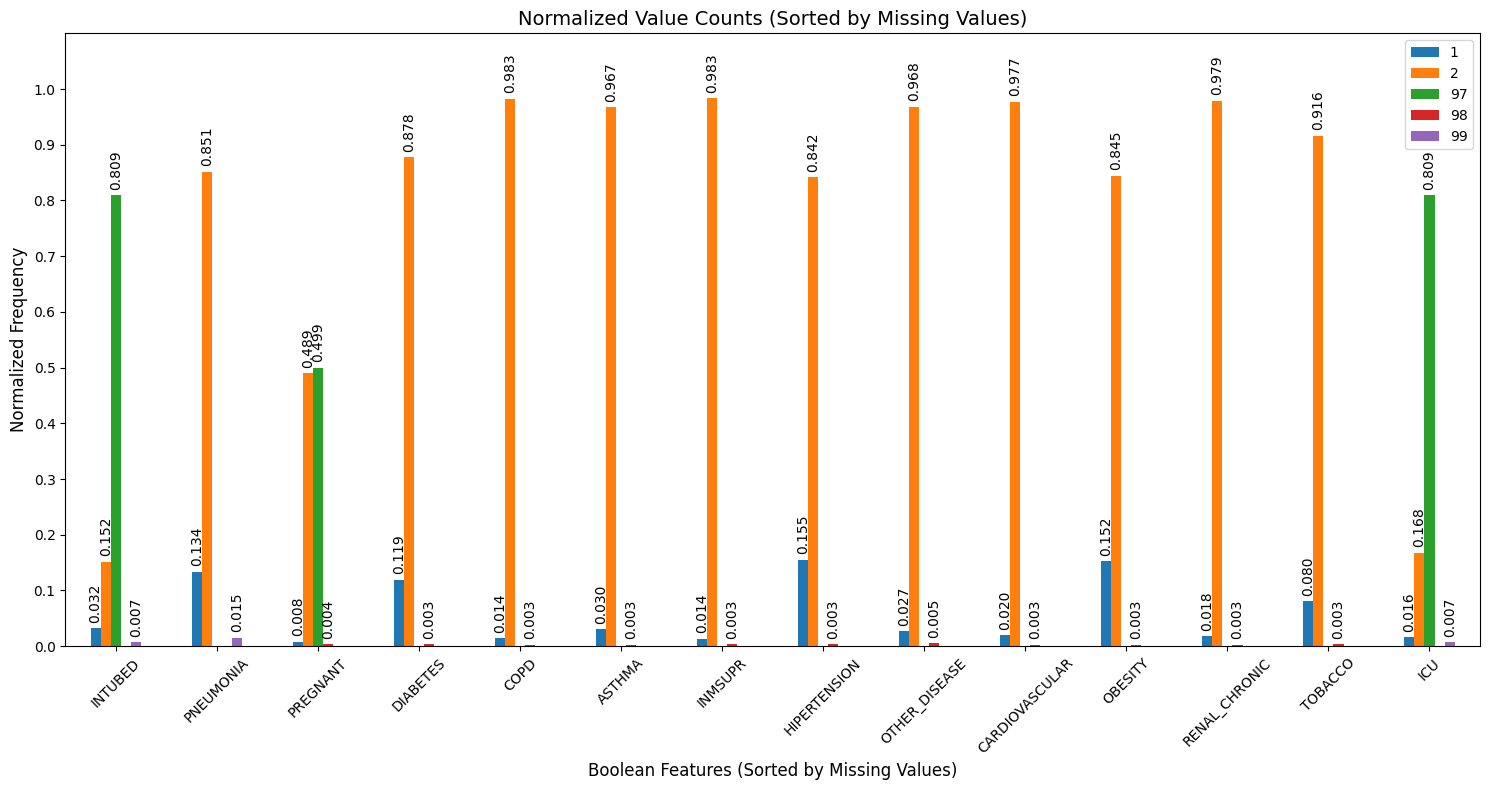

In [77]:
ax = df[boolean].apply(pd.Series.value_counts, normalize=True, dropna=False).T.plot(
    kind='bar', stacked=False, figsize=(15, 8), width=0.5
)

ax.set_ylim(0, 1.1)
ax.set_yticks([i * 0.1 for i in range(11)])

# Add bar labels with 2 decimal points, rotated 90 degrees, and moved upward
for container in ax.containers:
    for bar in container:
        # Add labels above the bar
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height() + 0.01,  # Slightly above the bar
            f'{bar.get_height():.3f}' if bar.get_height() > 0 else '',
            ha='center',
            va='bottom',
            rotation=90,
            fontsize=10
        )

# Rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Add labels and title
ax.set_xlabel('Boolean Features (Sorted by Missing Values)', fontsize=12)
ax.set_ylabel('Normalized Frequency', fontsize=12)
ax.set_title('Normalized Value Counts (Sorted by Missing Values)', fontsize=14)

# Display the plot
plt.tight_layout()
plt.show()


The appearance of `98`'s is odd and need to be explored 

In [78]:
bool_df = df[boolean]

In [79]:
columns_with_98 = bool_df.columns[(bool_df == 98).any()].tolist()
print("Features containing 98's:")
print(columns_with_98)

Features containing 98's:
['PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC', 'TOBACCO']


In [80]:
columns_with_97 = bool_df.columns[(bool_df == 97).any()].tolist()
print("Features containing 97's:")
print(columns_with_97)

Features containing 97's:
['INTUBED', 'PREGNANT', 'ICU']


In [81]:
columns_with_99 = bool_df.columns[(bool_df == 99).any()].tolist()
print("Features containing 99's:")
print(columns_with_99)

Features containing 99's:
['INTUBED', 'PNEUMONIA', 'ICU']


`INTUBED` and `ICU` contain both `97`'s and `99`'s and according to the data description from source, these are Unknown values 

In [82]:
for item in ['INTUBED', 'ICU']:
    print(df[item].value_counts(normalize=True))

INTUBED
97    0.809235
2     0.151682
1     0.032097
99    0.006986
Name: proportion, dtype: float64
ICU
97    0.809235
2     0.167546
1     0.016077
99    0.007141
Name: proportion, dtype: float64


In [83]:
df[(df['INTUBED'] == 97)].equals(df[(df['ICU'] == 97)])

True

In [84]:
# Filter the DataFrame where the 'ICU' column is 97
filtered_df = df[df['ICU'] == 97]

# Check for columns with only one distinct value
columns_with_one_value = [col for col in filtered_df.columns if filtered_df[col].nunique() == 1 and col not in ['INTUBED', 'ICU']]

# Display the result
if columns_with_one_value:
    print("Columns with only one distinct value:", columns_with_one_value)
else:
    print("No columns with only one distinct value.")

Columns with only one distinct value: ['PATIENT_TYPE']


In [85]:
filtered_df.sample(3)

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
793914,2,12,2,1,9999-99-99,97,2,43,97,2,...,2,2,2,2,2,2,2,2,7,97
185920,2,4,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,6,97
837492,1,12,1,1,9999-99-99,97,2,59,2,2,...,2,2,2,2,2,2,2,2,7,97


`97`'s in `INTUBED` and `ICU` columns are all assigned for `PATIENT_TYPE` = 1 - Returned home patients

In [86]:
# Filter the DataFrame where the 'ICU' column is 97
filtered_df = df[(df['ICU'] == 99) | (df['INTUBED'] == 99)]

# Check for columns with only one distinct value
columns_with_one_value = [col for col in filtered_df.columns if filtered_df[col].nunique() == 1 and col not in ['INTUBED', 'ICU']]

# Display the result
if columns_with_one_value:
    print("Columns with only one distinct value:", columns_with_one_value)
else:
    print("No columns with only one distinct value.")

Columns with only one distinct value: ['PATIENT_TYPE']


In [87]:
filtered_df.sample(3)

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
222729,1,4,1,2,9999-99-99,99,99,33,2,2,...,1,2,2,2,2,2,2,2,7,99
223541,1,4,1,2,9999-99-99,99,99,8,2,2,...,2,2,2,2,2,2,2,2,7,99
726544,1,12,1,2,9999-99-99,99,99,1,2,2,...,2,2,2,2,2,2,2,2,7,99


`99`'s in `INTUBED` and `ICU` columns are all assigned for `PATIENT_TYPE` = 2 - Hospitalization patients

Replace `99`'s and `97`'s with `NA` value

In [88]:
df[['INTUBED', 'ICU']] = df[['INTUBED', 'ICU']].replace({2: 0, 97: pd.NA, 99: pd.NA})

In [89]:
for item in ['INTUBED', 'ICU']:
    print(df[item].value_counts(normalize=True,dropna=False))

INTUBED
<NA>    0.816221
0       0.151682
1       0.032097
Name: proportion, dtype: float64
ICU
<NA>    0.816377
0       0.167546
1       0.016077
Name: proportion, dtype: float64


`PNEUMONIA` only contain `99`'s, which are unknown values as well

In [90]:
for item in ['PNEUMONIA']:
    print(df[item].value_counts(normalize=True))

PNEUMONIA
2     0.851188
1     0.133551
99    0.015262
Name: proportion, dtype: float64


Replace `99`'s with `NA` value

In [91]:
df[['PNEUMONIA']] = df[['PNEUMONIA']].replace({2: 0, 99: pd.NA})

In [92]:
for item in ['PNEUMONIA']:
    print(df[item].value_counts(normalize=True, dropna=False))

PNEUMONIA
0       0.851188
1       0.133551
<NA>    0.015262
Name: proportion, dtype: float64


Since only `PREGNANT` contains both `98`'s and `97`'s, we should explore this column data

In [93]:
for item in ['PREGNANT']:
    print(df[item].value_counts(normalize=False))

PREGNANT
97    523511
2     513179
1       8131
98      3754
Name: count, dtype: int64


First lets check for the case of Male patients

In [94]:
df[(df['SEX'] == 2) & (df['PREGNANT'] == 97)].SEX.count()

523511

In [95]:
df[(df['SEX'] == 2) & (df['PREGNANT'] == 97)].equals(df[(df['SEX'] == 2)])

True

The case for Female patients

In [96]:
df[(df['SEX'] == 1) & (df['PREGNANT'] == 98)].SEX.count()

3754

In [97]:
df[(df['SEX'] == 1) & (df['PREGNANT'] == 98)].equals(df[(df['PREGNANT'] == 98)])

True

In the `PREGNANT` column, all `97`'s values are assigned for male patients indicate impossibility and `98`'s values are only assigned for female patients indicate unknown data

Based on these findings about `PREGNANT`, we decided to keep a third values for `PREGNANT` which is `2` to assign for male patients

In [98]:
#Replace 98 to NA
df[['PREGNANT']] = df[['PREGNANT']].replace(98, pd.NA)
#Replace 2 to 0 for conventional boolean values
df[['PREGNANT']] = df[['PREGNANT']].replace(2, 0)
#Replace 97 to 2 for the case of male patients
df[['PREGNANT']] = df[['PREGNANT']].replace(97, 2)

In [99]:
for item in ['PREGNANT']:
    print(df[item].value_counts(normalize=False,dropna=False))

PREGNANT
2       523511
0       513179
1         8131
<NA>      3754
Name: count, dtype: int64


Replacing `98`'s with `NA` in other boolean columns and change `2`'s to `0`'s to match conventional Boolean values.

In [100]:
other = [item for item in boolean if item not in ['PREGNANT'] + ['INTUBED', 'ICU'] + ['PNEUMONIA']]

In [101]:
other

['DIABETES',
 'COPD',
 'ASTHMA',
 'INMSUPR',
 'HIPERTENSION',
 'OTHER_DISEASE',
 'CARDIOVASCULAR',
 'OBESITY',
 'RENAL_CHRONIC',
 'TOBACCO']

In [102]:
df[other] = df[other].replace({2: 0, 98: pd.NA})

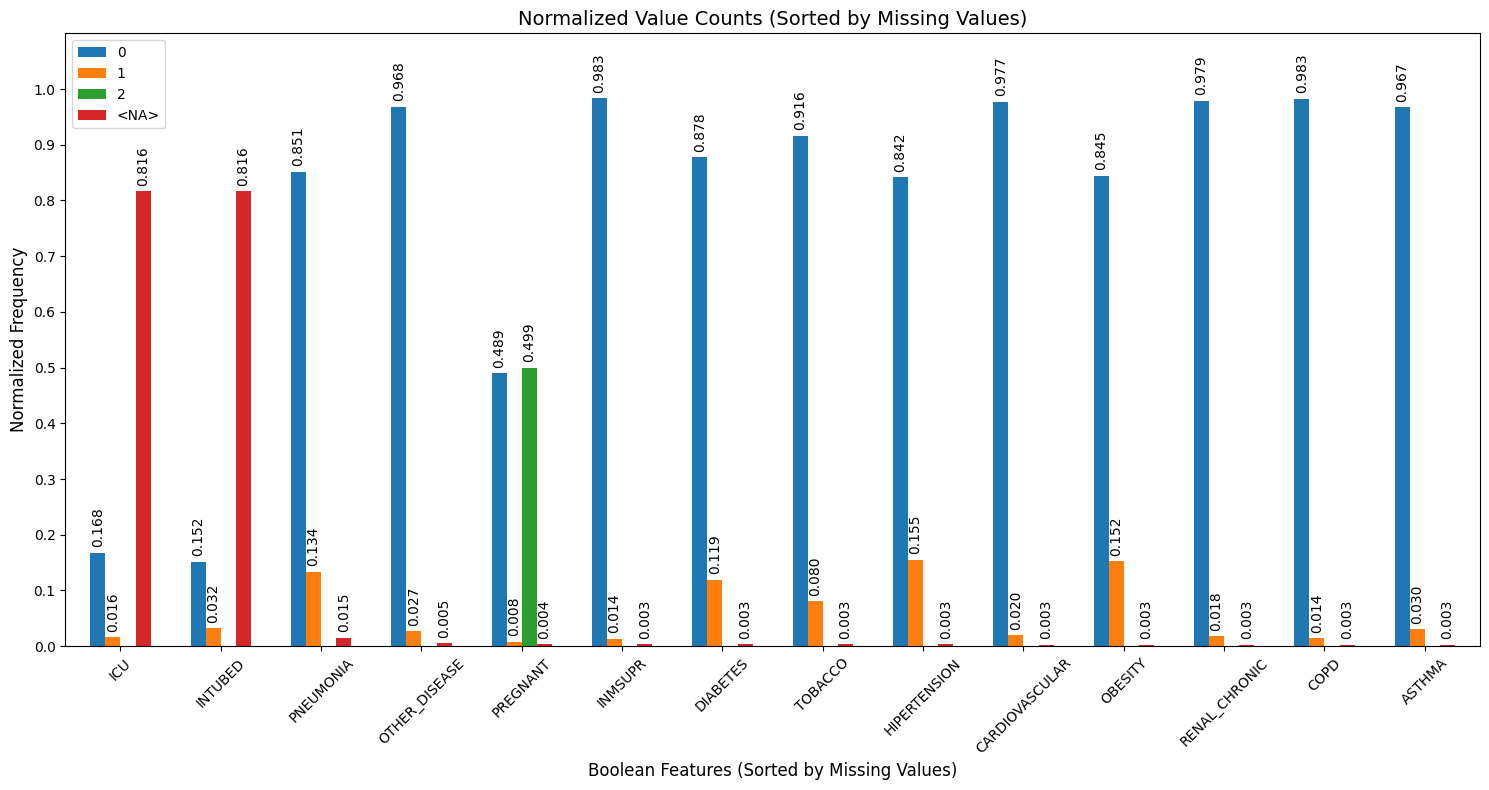

In [103]:
# Calculate the number of `pd.NA` values for each column
na_counts = df[boolean].isna().sum()

# Sort the boolean columns by the number of pd.NA` values in descending order
sorted_columns = na_counts.sort_values(ascending=False).index

# Plot stacked bar chart for sorted columns
ax = df[sorted_columns].apply(pd.Series.value_counts, normalize=True, dropna=False).T.plot(
    kind='bar', stacked=False, figsize=(15, 8), width=0.6
)

ax.set_ylim(0, 1.1)
ax.set_yticks([i * 0.1 for i in range(11)])

# Add bar labels with 2 decimal points, rotated 90 degrees, and moved upward
for container in ax.containers:
    for bar in container:
        # Add labels above the bar
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height() + 0.01,  # Slightly above the bar
            f'{bar.get_height():.3f}' if bar.get_height() > 0 else '',
            ha='center',
            va='bottom',
            rotation=90,
            fontsize=10
        )

# Rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Add labels and title
ax.set_xlabel('Boolean Features (Sorted by Missing Values)', fontsize=12)
ax.set_ylabel('Normalized Frequency', fontsize=12)
ax.set_title('Normalized Value Counts (Sorted by Missing Values)', fontsize=14)

# Display the plot
plt.tight_layout()
plt.show()



In [104]:
print('Percentage of NAN values in Boolean Feautures:')
for col in df[boolean].columns :
    print('{:<20} => {:>10.2f}%'.format(col, df[boolean][col].isna().sum()/len(df)*100))

Percentage of NAN values in Boolean Feautures:
INTUBED              =>      81.62%
PNEUMONIA            =>       1.53%
PREGNANT             =>       0.36%
DIABETES             =>       0.32%
COPD                 =>       0.29%
ASTHMA               =>       0.28%
INMSUPR              =>       0.32%
HIPERTENSION         =>       0.30%
OTHER_DISEASE        =>       0.48%
CARDIOVASCULAR       =>       0.29%
OBESITY              =>       0.29%
RENAL_CHRONIC        =>       0.29%
TOBACCO              =>       0.31%
ICU                  =>      81.64%


Observing the histograms of Boolean features, over 80% of the `ICU` and `INTUBED` columns data are N.A values so we decided to drop these 2 columns

In [105]:
df.drop(columns=['INTUBED','ICU'],axis = 1,inplace=True)

In [106]:
df.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL'],
      dtype='object')

##### Target Column

The `DATE_DIED` column gives information on the death date of the patient, which is not exactly what we need. 

We decided to create a new column as the target for the classification problem `DEATH`. 

If the patient died, indicate the date of death; otherwise, use `9999-99-99`.

Replacing values in `DATE_DIED` column: `9999-99-99` to 1 and 0 otherwise

In [107]:
df['DIED'] = np.where(df['DATE_DIED'] == '9999-99-99',0,1)
df.drop(columns = 'DATE_DIED' , inplace = True)

In [108]:
target = ['DIED']
print('Percentage of NAN values in Target:')
for col in df[target].columns :
    print('{:<20} => {:>10.2f}%'.format(col, df[target][col].isna().sum()/len(df)*100))

Percentage of NAN values in Target:
DIED                 =>       0.00%


##### Categorical Features

In [109]:
categorical

['DATE_DIED',
 'MEDICAL_UNIT',
 'PATIENT_TYPE',
 'CLASIFFICATION_FINAL',
 'USMER',
 'SEX']

In [110]:
categorical = [item for item in categorical if item not in ['DATE_DIED']]

In [111]:
print('Percentage of NAN values in Categorical Features:')
for col in df[categorical].columns :
    print('{:<20} => {:>10.2f}%'.format(col, df[categorical][col].isna().sum()/len(df)*100))

Percentage of NAN values in Categorical Features:
MEDICAL_UNIT         =>       0.00%
PATIENT_TYPE         =>       0.00%
CLASIFFICATION_FINAL =>       0.00%
USMER                =>       0.00%
SEX                  =>       0.00%


In [112]:
for col in df[categorical].columns:
    print(f"Column: {col}")
    print(
        df[col].value_counts(normalize=True, sort=False)
        .sort_index(key=lambda x: x.astype(int))  # Sorting by numerical values
    )
    print()


Column: MEDICAL_UNIT
MEDICAL_UNIT
1     0.000144
2     0.000161
3     0.018287
4     0.299840
5     0.006908
6     0.038704
7     0.000850
8     0.009917
9     0.036350
10    0.007508
11    0.005319
12    0.575061
13    0.000950
Name: proportion, dtype: float64

Column: PATIENT_TYPE
PATIENT_TYPE
1    0.809235
2    0.190765
Name: proportion, dtype: float64

Column: CLASIFFICATION_FINAL
CLASIFFICATION_FINAL
1    0.008203
2    0.001765
3    0.363853
4    0.002977
5    0.024882
6    0.122197
7    0.476122
Name: proportion, dtype: float64

Column: USMER
USMER
1    0.367806
2    0.632194
Name: proportion, dtype: float64

Column: SEX
SEX
1    0.500741
2    0.499259
Name: proportion, dtype: float64



In [113]:
df['SEX'].replace({1: "Female", 2: "Male"}, inplace=True)

/var/folders/t6/qcyvz2zx1n51jtj_nzvvn2b80000gn/T/ipykernel_37112/1570389761.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['SEX'].replace({1: "Female", 2: "Male"}, inplace=True)


In [114]:
df['PATIENT_TYPE'].replace({1: "Returned Home", 2: "Hospitalization"}, inplace=True)

/var/folders/t6/qcyvz2zx1n51jtj_nzvvn2b80000gn/T/ipykernel_37112/2961388573.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PATIENT_TYPE'].replace({1: "Returned Home", 2: "Hospitalization"}, inplace=True)


##### Continuous feature

In [115]:
df[continuous]

,AGE
0,65
1,72
2,55
3,53
4,68
...,...
1048570,40
1048571,51
1048572,55
1048573,28


In [116]:
print('Percentage of NAN values in AGE:')
print('{:<20} => {:>10.2f}%'.format('AGE', df['AGE'].isna().sum()/len(df)*100))

Percentage of NAN values in AGE:
AGE                  =>       0.00%


#### Data mining

##### Data Imputation

In [117]:
boolean = [item for item in boolean if item not in ['INTUBED', 'ICU']]

In [118]:
print('Percentage of NAN values in Boolean Feautures:')
for col in df[boolean].columns :
    print('{:<20} => {:>10.2f}%'.format(col, df[boolean][col].isna().sum()/len(df)*100))

Percentage of NAN values in Boolean Feautures:
PNEUMONIA            =>       1.53%
PREGNANT             =>       0.36%
DIABETES             =>       0.32%
COPD                 =>       0.29%
ASTHMA               =>       0.28%
INMSUPR              =>       0.32%
HIPERTENSION         =>       0.30%
OTHER_DISEASE        =>       0.48%
CARDIOVASCULAR       =>       0.29%
OBESITY              =>       0.29%
RENAL_CHRONIC        =>       0.29%
TOBACCO              =>       0.31%


In [119]:
# Calculate the percentage of rows with at least one NA
na_percentage = (df.isna().any(axis=1).sum() / len(df)) * 100
print(f"Percentage of rows with NA values: {na_percentage:.2f}%")

Percentage of rows with NA values: 2.54%


In [120]:
# Extract all rows with at least one NA value
df_NA = df[df.isna().any(axis=1)]


In [121]:
df_NA

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,DIED
151,1,2,Female,Hospitalization,<NA>,1,0,0,0,0,0,0,0,0,0,0,0,7,1
169,1,2,Male,Returned Home,<NA>,13,2,0,0,0,0,0,0,0,0,0,0,6,0
170,1,2,Male,Returned Home,<NA>,2,2,0,0,0,0,0,0,0,0,0,0,6,0
186,1,2,Female,Returned Home,<NA>,1,0,0,0,0,0,0,0,0,0,0,0,7,0
187,1,2,Female,Hospitalization,<NA>,13,0,0,0,1,0,0,0,0,0,0,0,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048253,1,13,Male,Returned Home,1,70,2,0,0,0,1,0,<NA>,0,0,0,1,7,0
1048258,1,13,Female,Hospitalization,1,50,0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,7,0
1048259,1,13,Male,Hospitalization,1,50,2,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,7,0
1048260,1,13,Male,Hospitalization,1,40,2,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,7,0


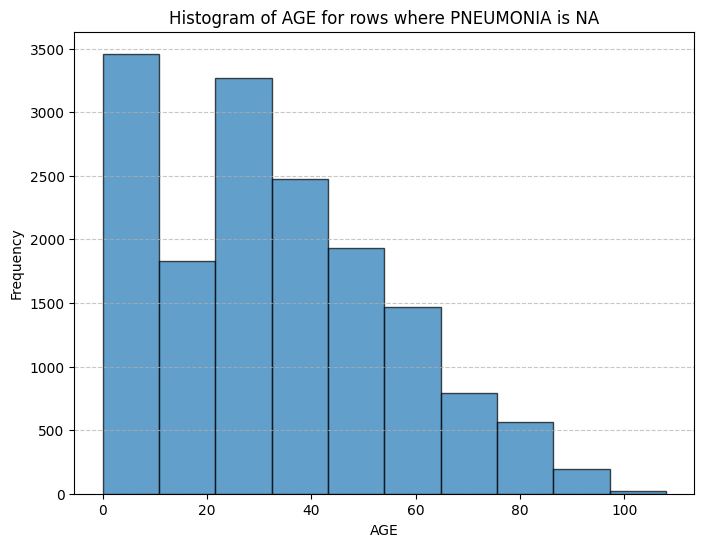

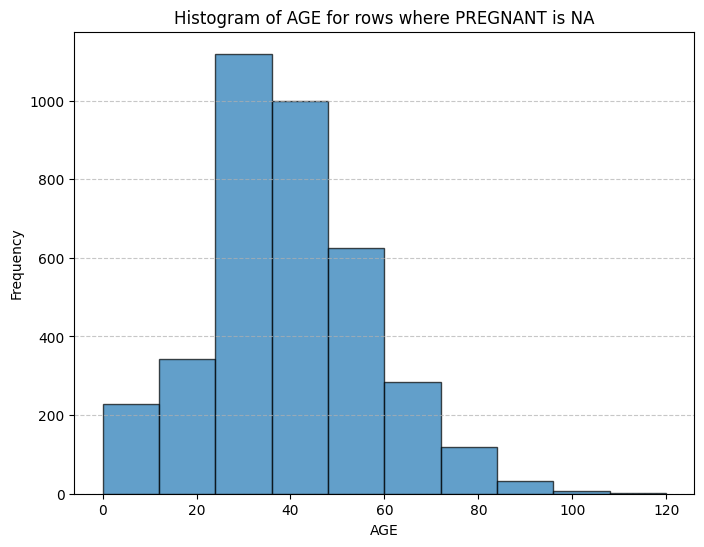

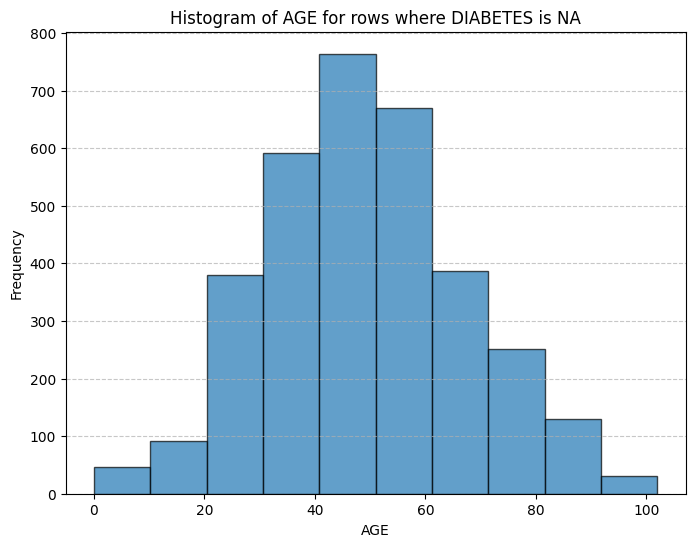

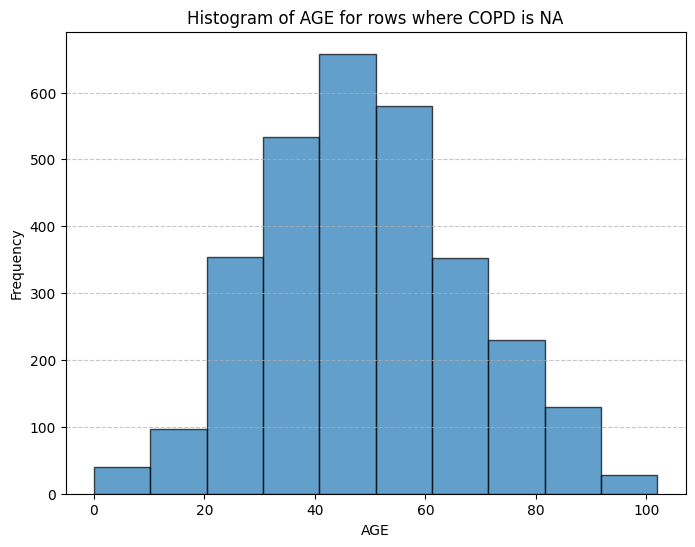

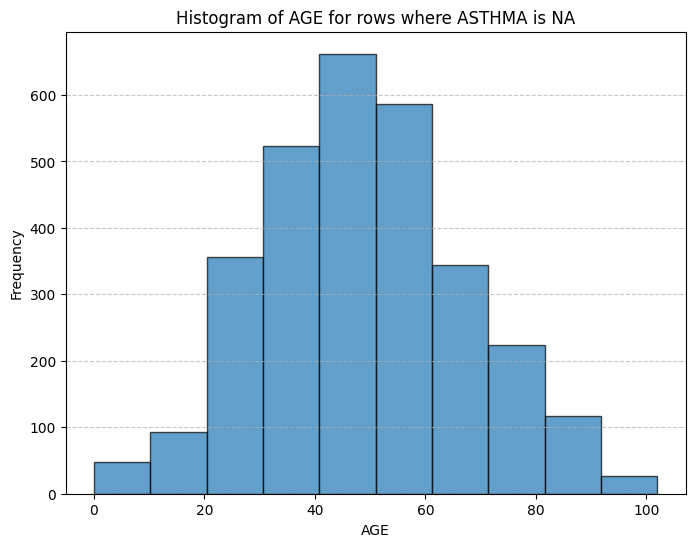

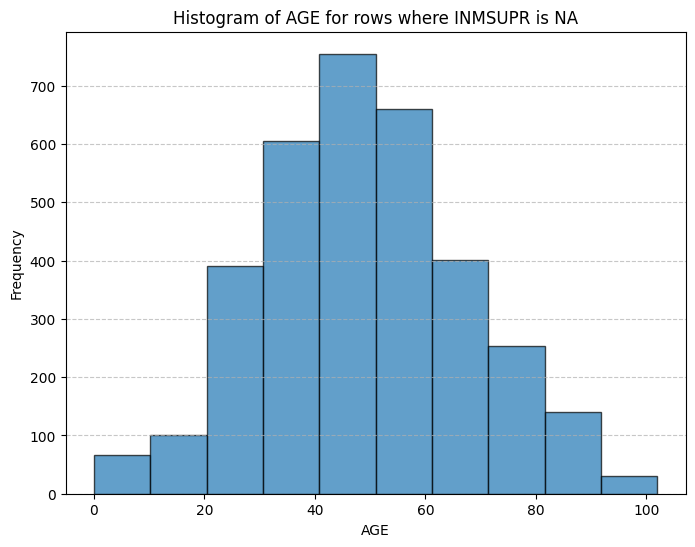

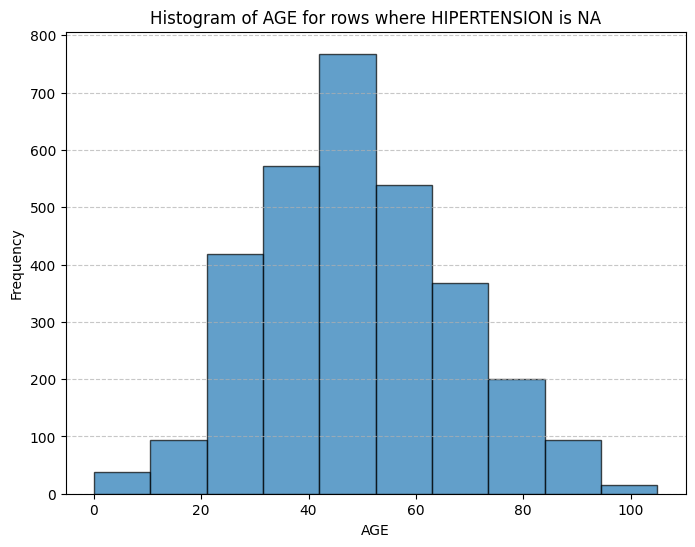

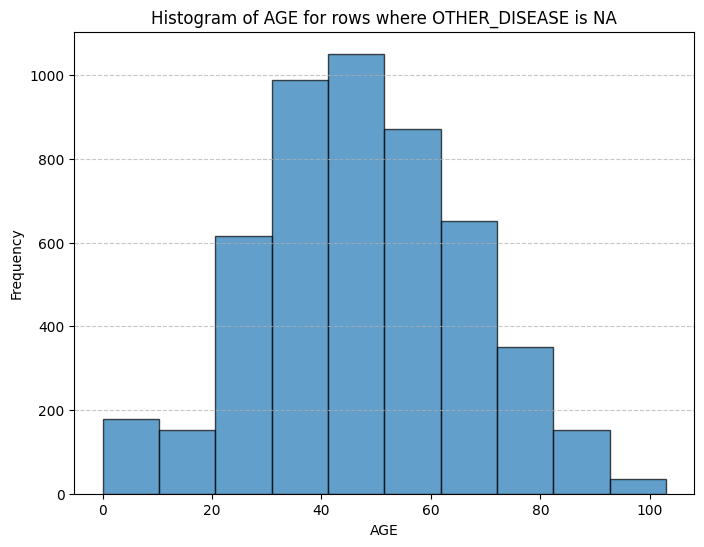

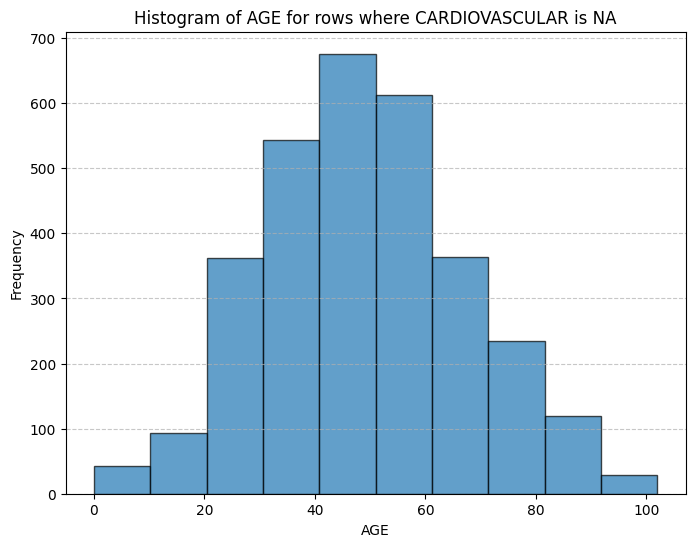

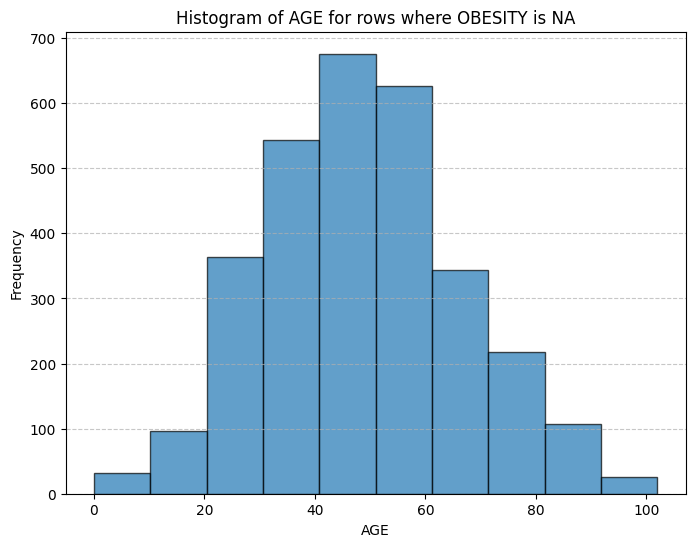

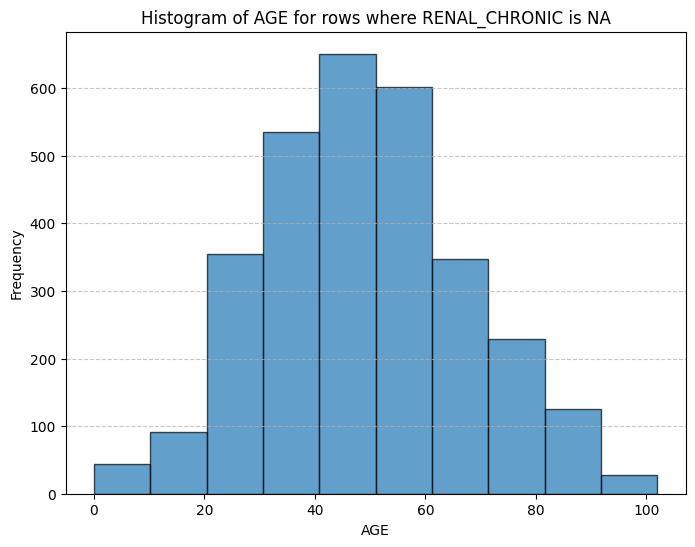

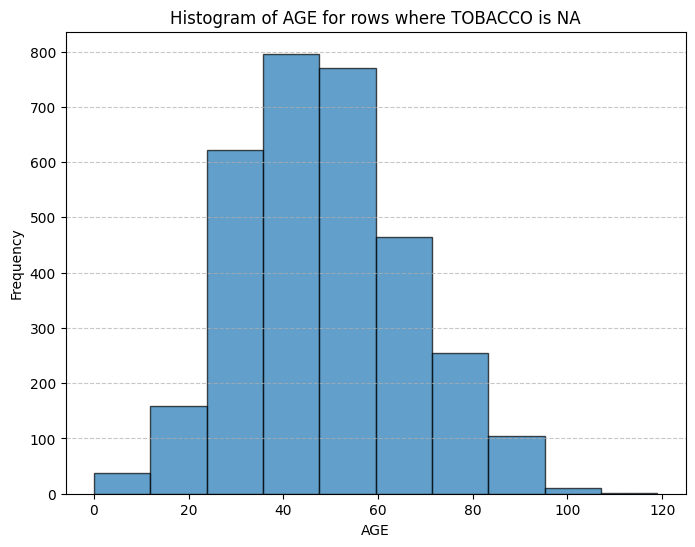

In [123]:
# Iterate through the boolean columns
for col in boolean:
    temp = df_NA[df_NA[col].isna()]  # Filter rows where the boolean column has NA
    
    # Check if 'AGE' exists in temp
    if 'AGE' in temp.columns:
        plt.figure(figsize=(8, 6))
        plt.hist(temp['AGE'].dropna(), bins=10, edgecolor='black', alpha=0.7)  # Drop NA values in AGE
        plt.title(f"Histogram of AGE for rows where {col} is NA")
        plt.xlabel("AGE")
        plt.ylabel("Frequency")
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()

    
    

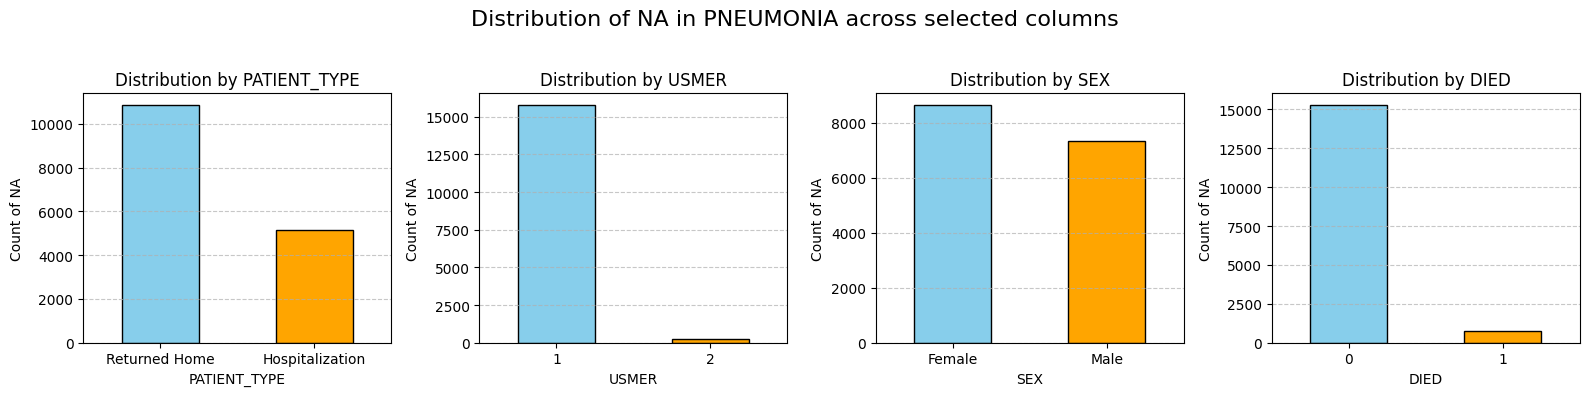

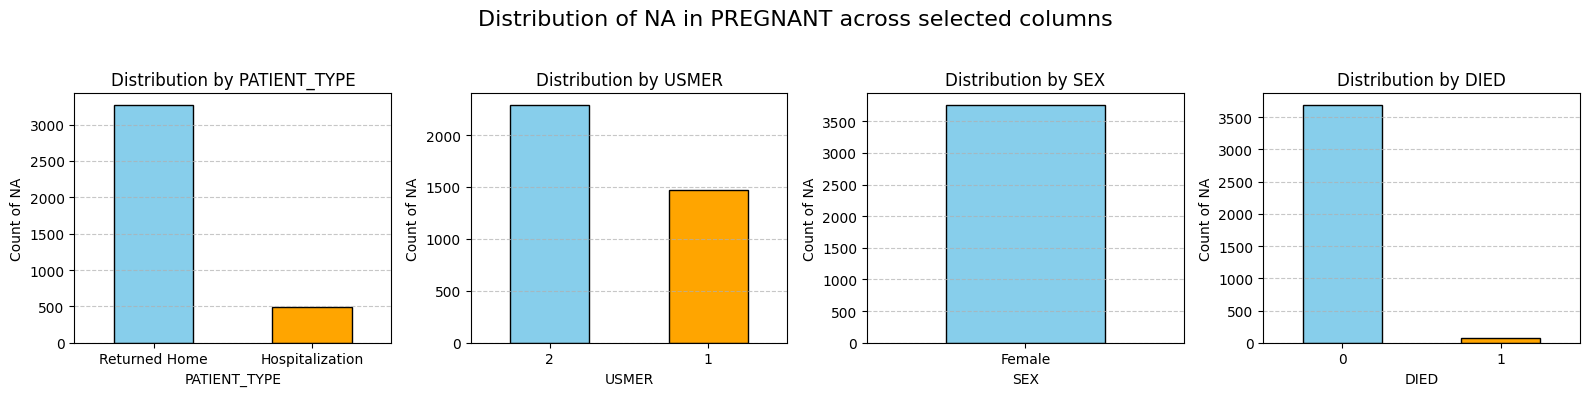

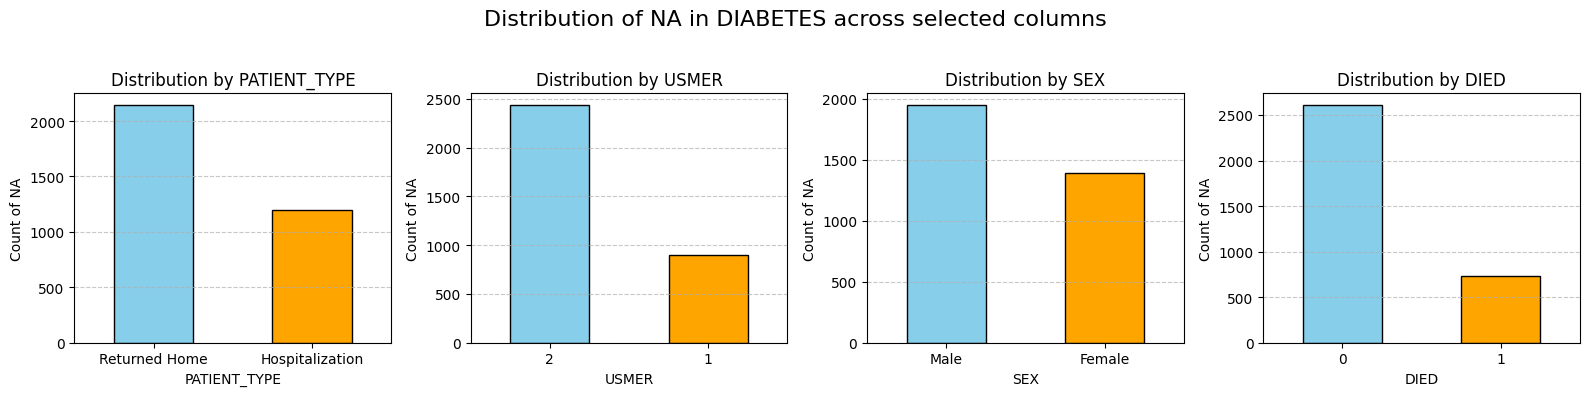

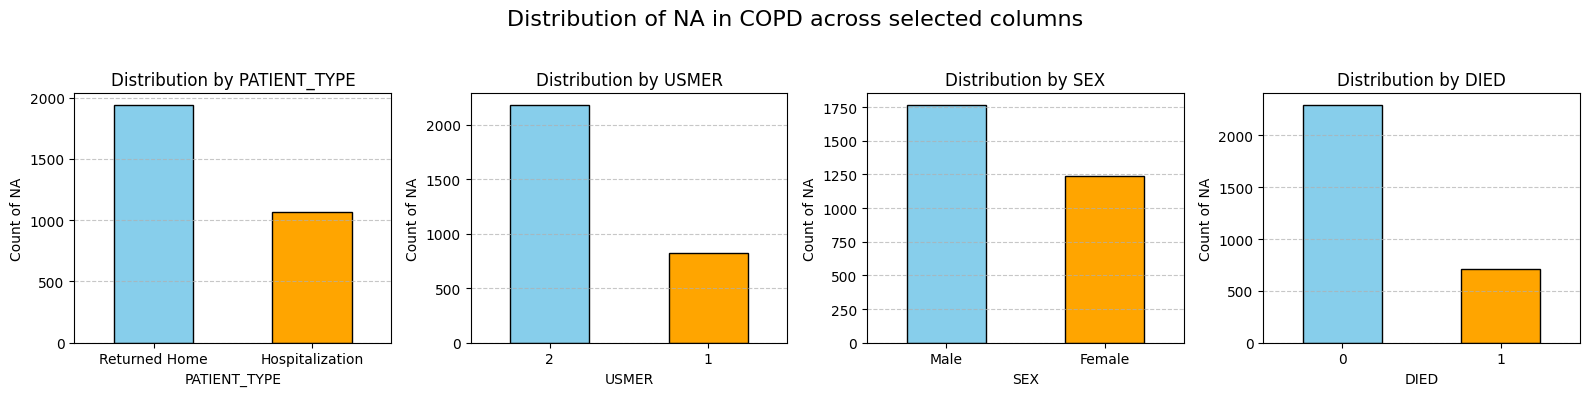

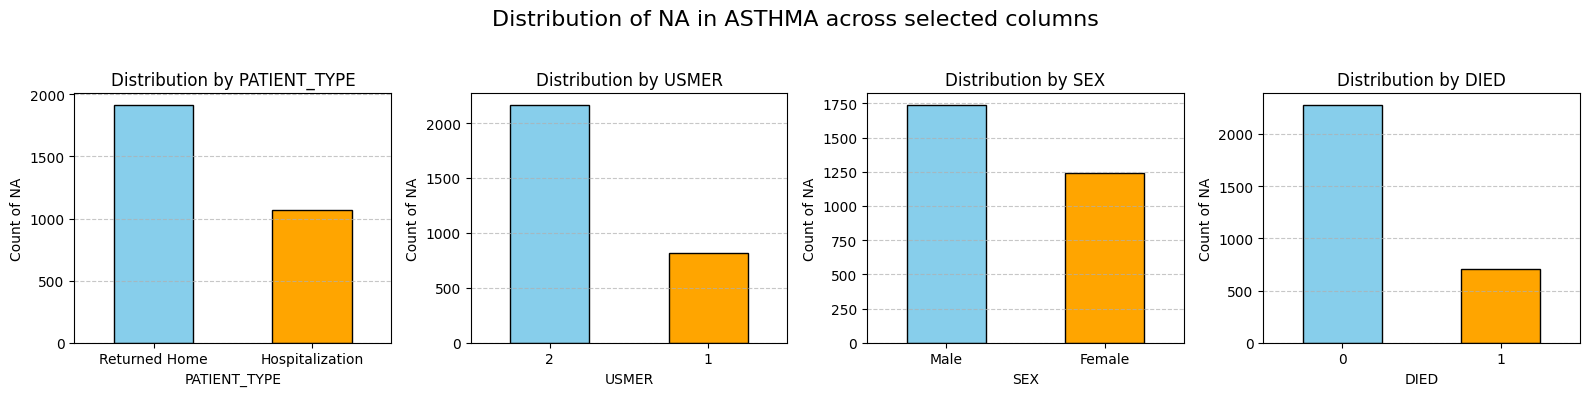

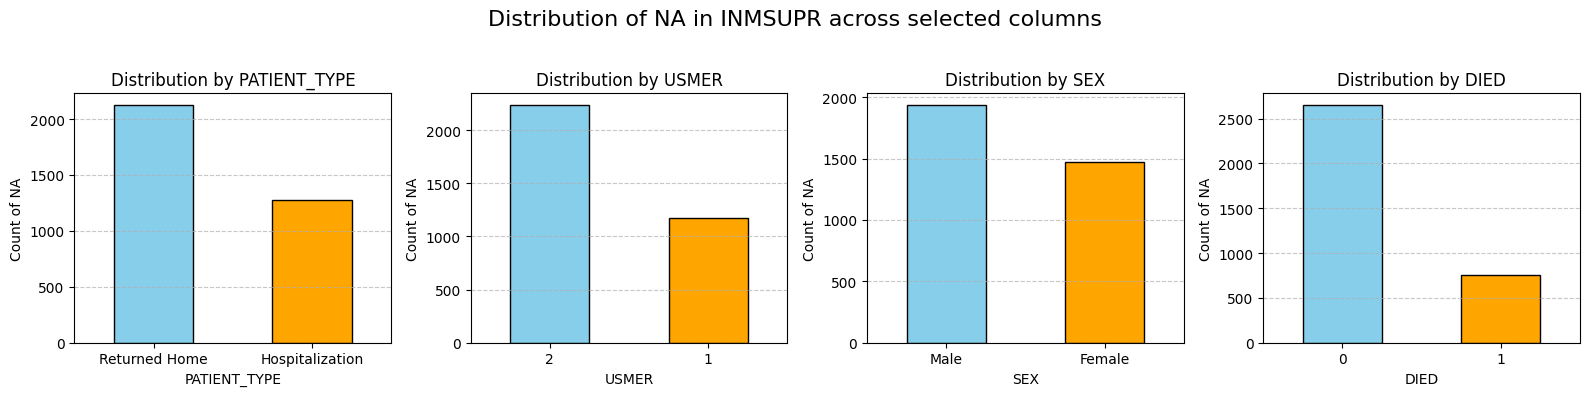

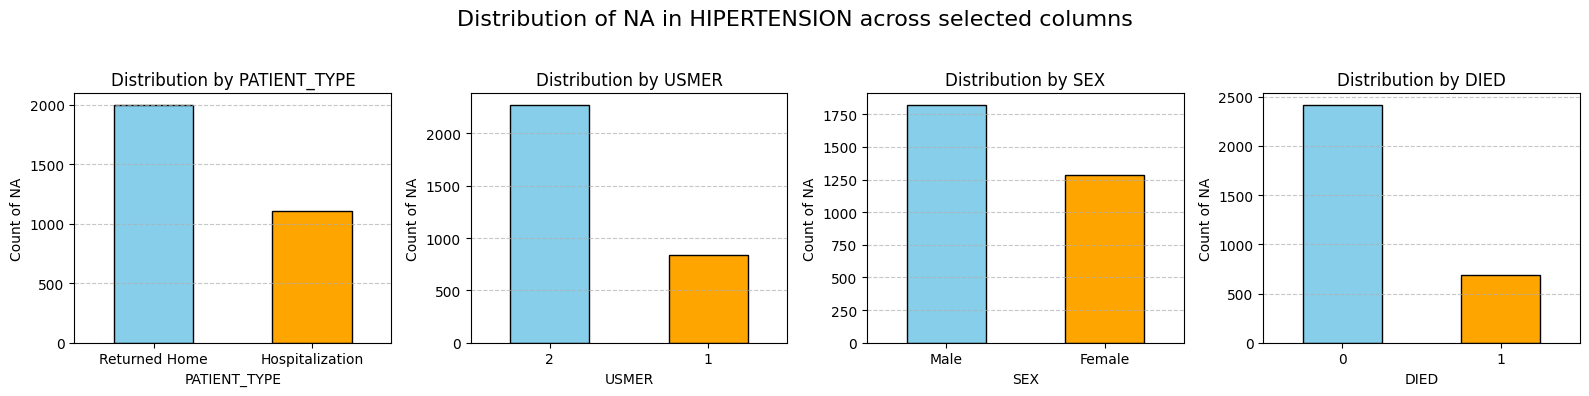

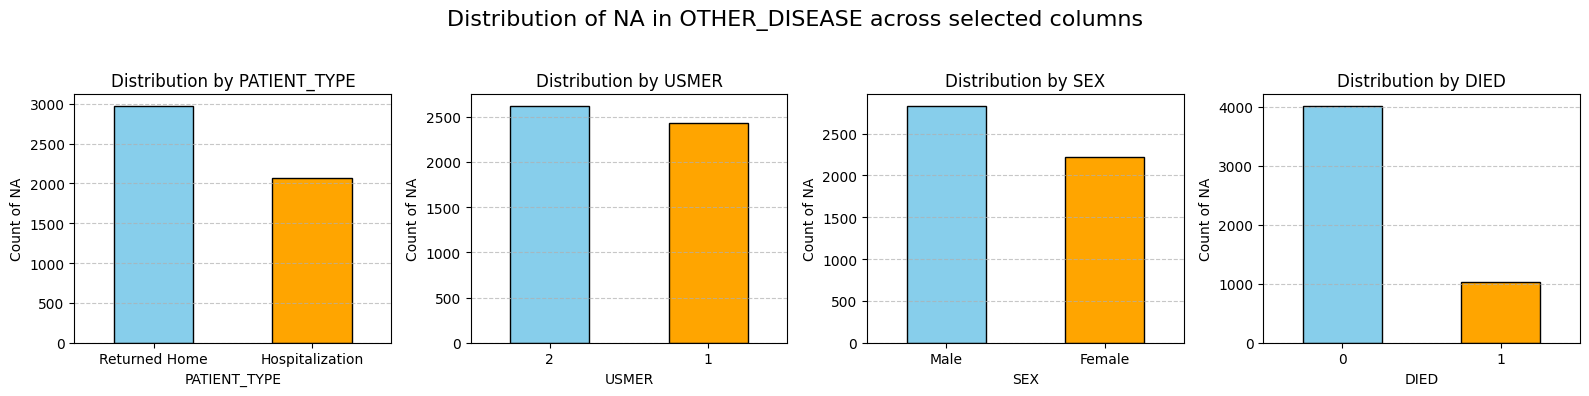

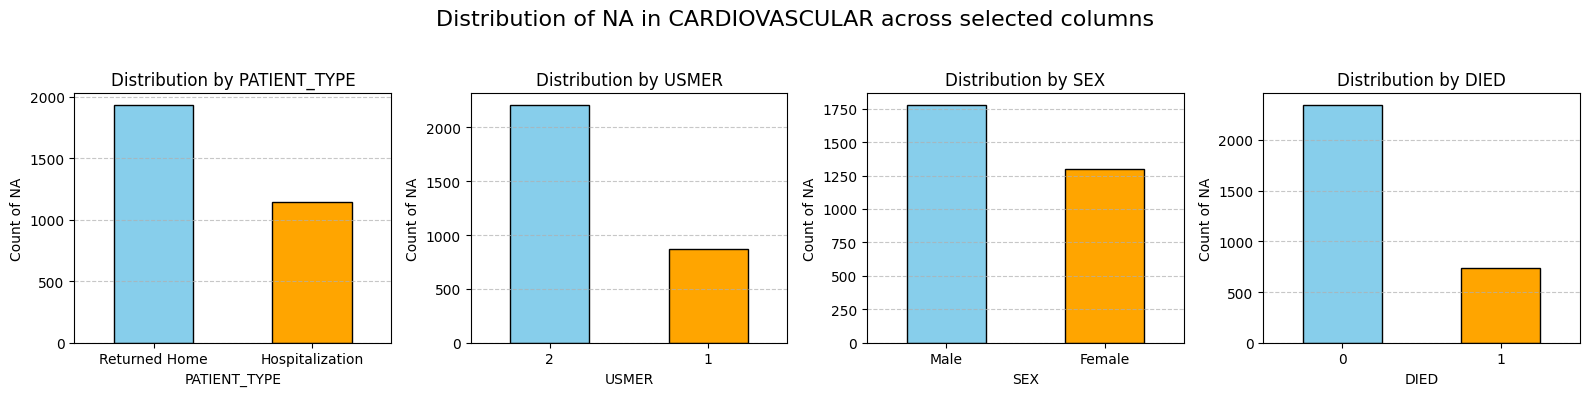

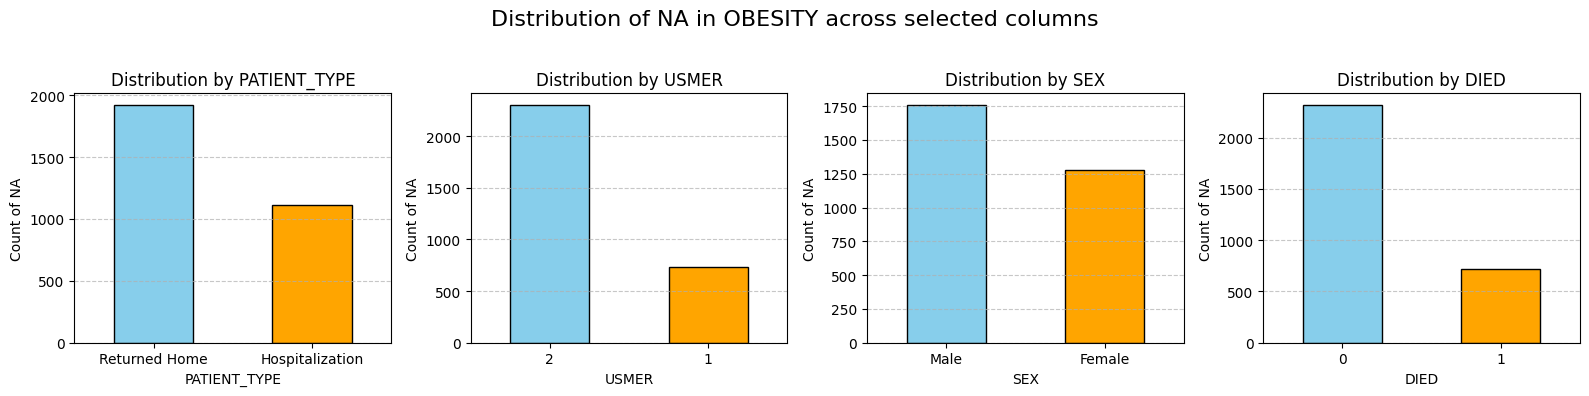

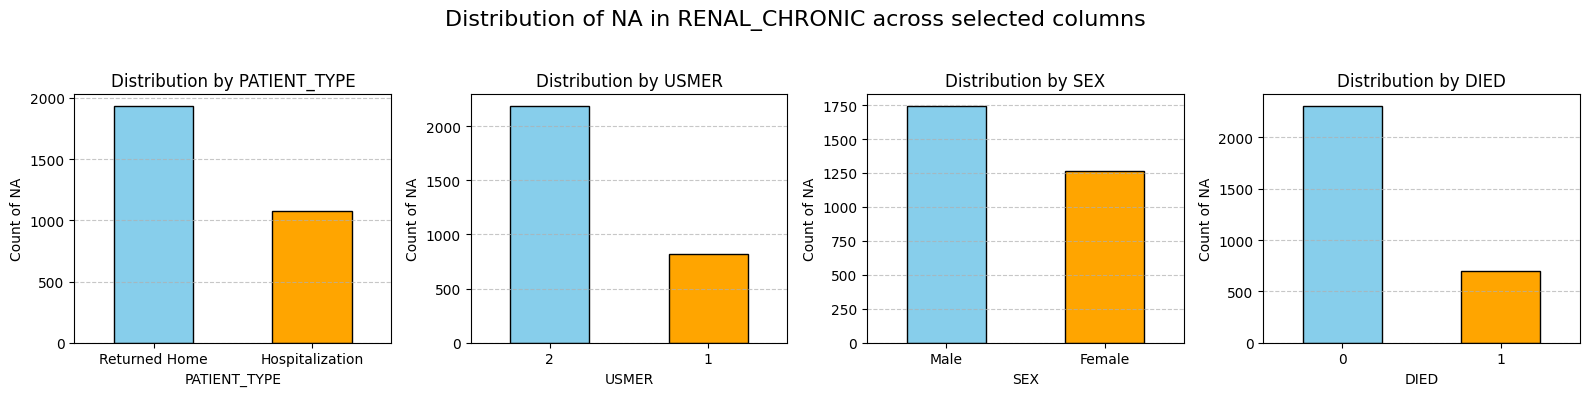

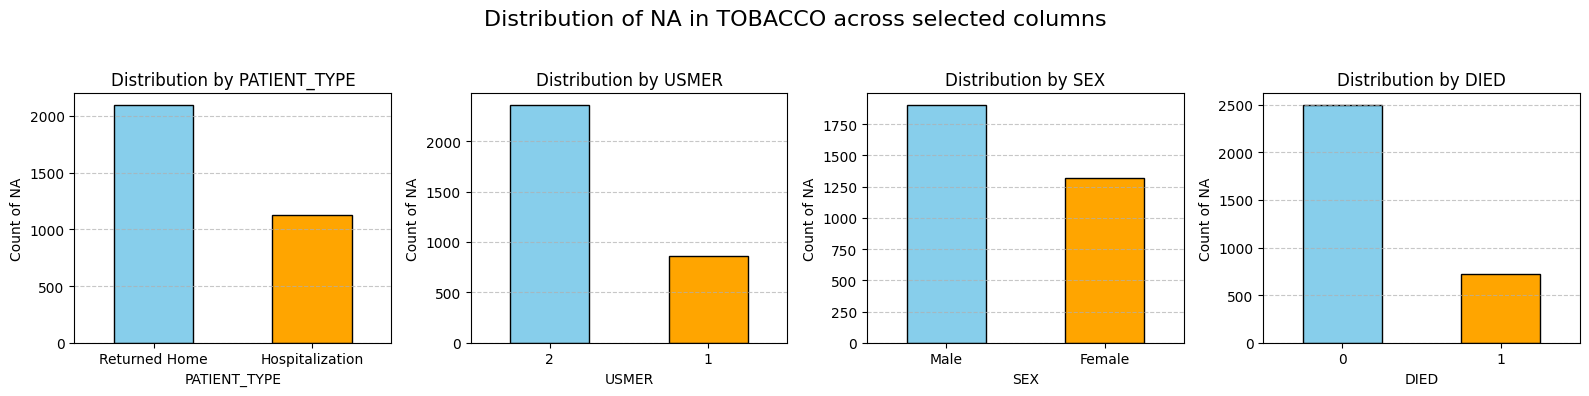

In [126]:
group_columns = ['PATIENT_TYPE', 'USMER', 'SEX', 'DIED']

# Iterate through the boolean columns
for col in boolean:
    temp = df_NA[df_NA[col].isna()]  # Filter rows where the current boolean column has NA

    # Check if all columns in group_columns exist in temp
    available_columns = [grp_col for grp_col in group_columns if grp_col in temp.columns]

    if available_columns:
        # Create subplots
        fig, axes = plt.subplots(ncols=len(available_columns), figsize=(16, 4))
        fig.suptitle(f"Distribution of NA in {col} across selected columns", fontsize=16)
        
        # Ensure axes is iterable (handles single subplot cases)
        if len(available_columns) == 1:
            axes = [axes]

        for ax, grp_col in zip(axes, available_columns):
            # Calculate value counts for the current column
            counts = temp[grp_col].value_counts()
            
            # Plot on the current axis
            counts.plot(
                kind='bar', 
                ax=ax, 
                color=['skyblue', 'orange'],  # Two colors for the two values
                edgecolor='black'
            )
            ax.set_title(f"Distribution by {grp_col}")
            ax.set_xlabel(grp_col)
            ax.set_ylabel("Count of NA")
            ax.grid(axis='y', linestyle='--', alpha=0.7)
            ax.set_xticks(range(len(counts.index)))
            ax.set_xticklabels(counts.index, rotation=0)  # Remove rotation

        plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit title
        plt.show()



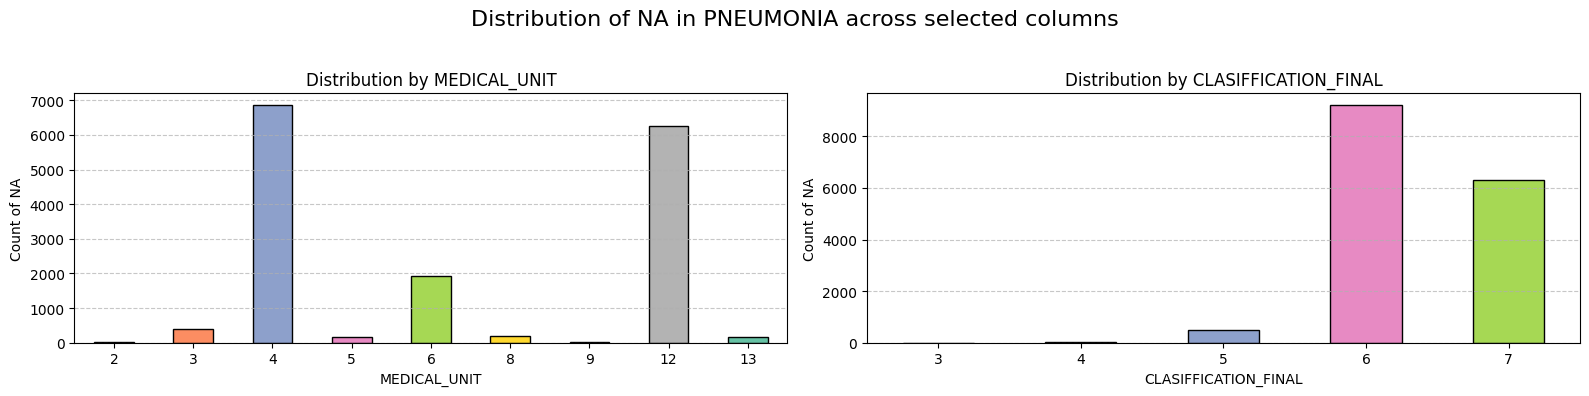

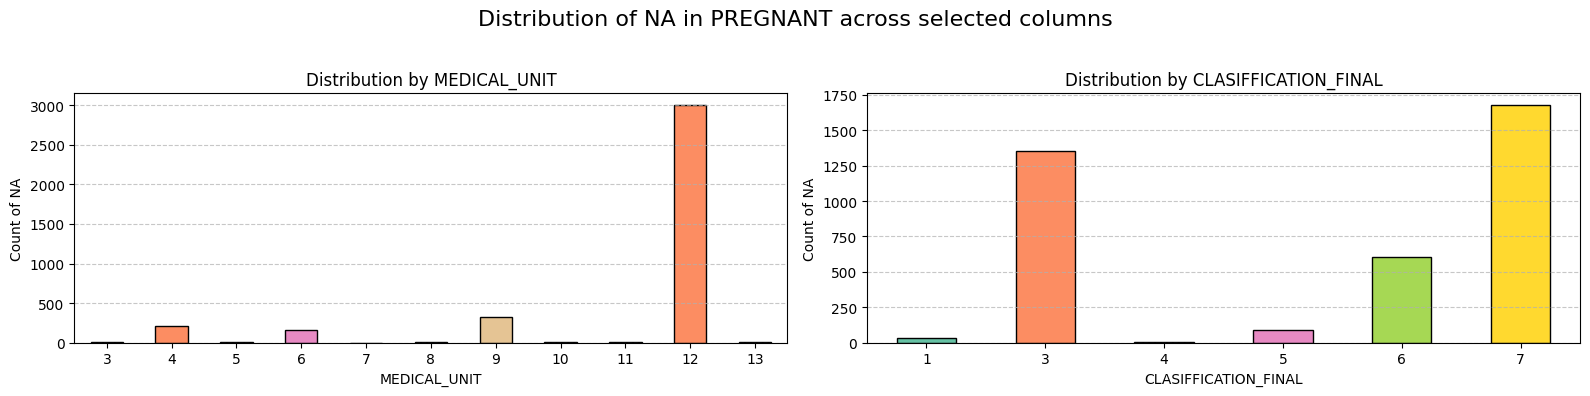

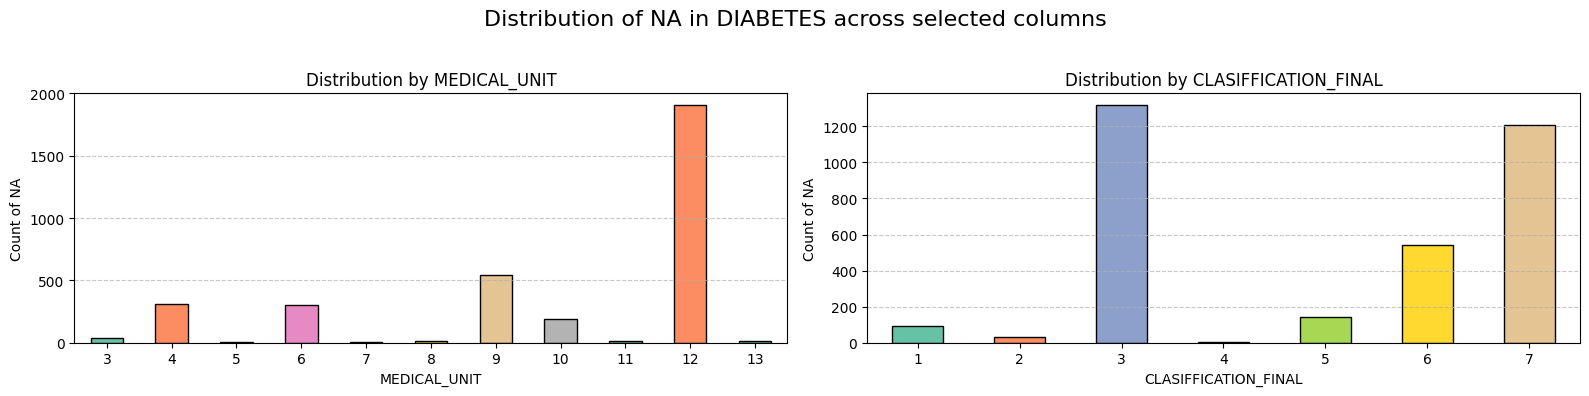

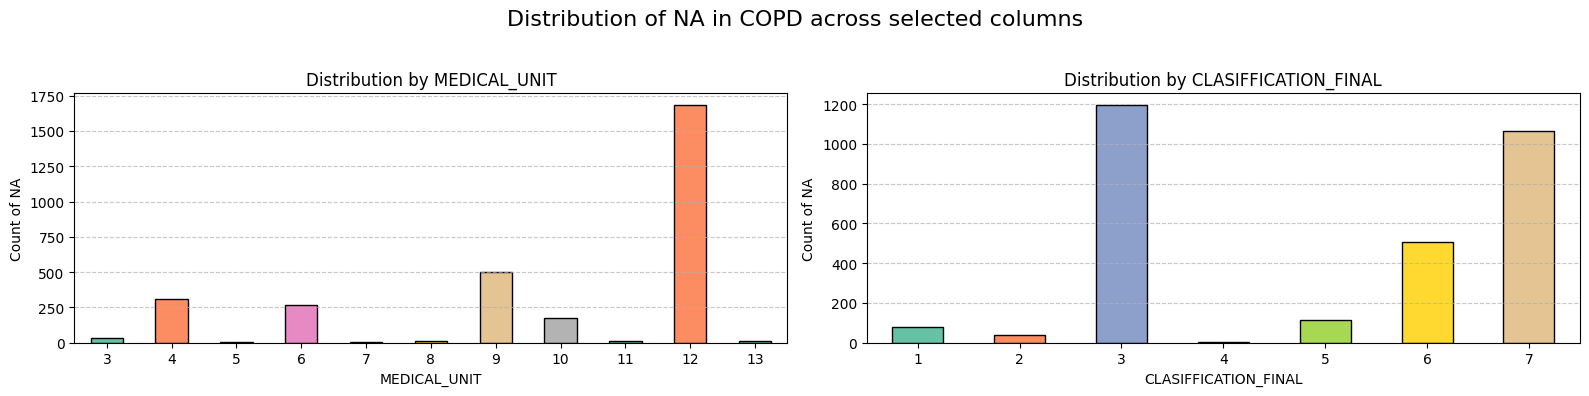

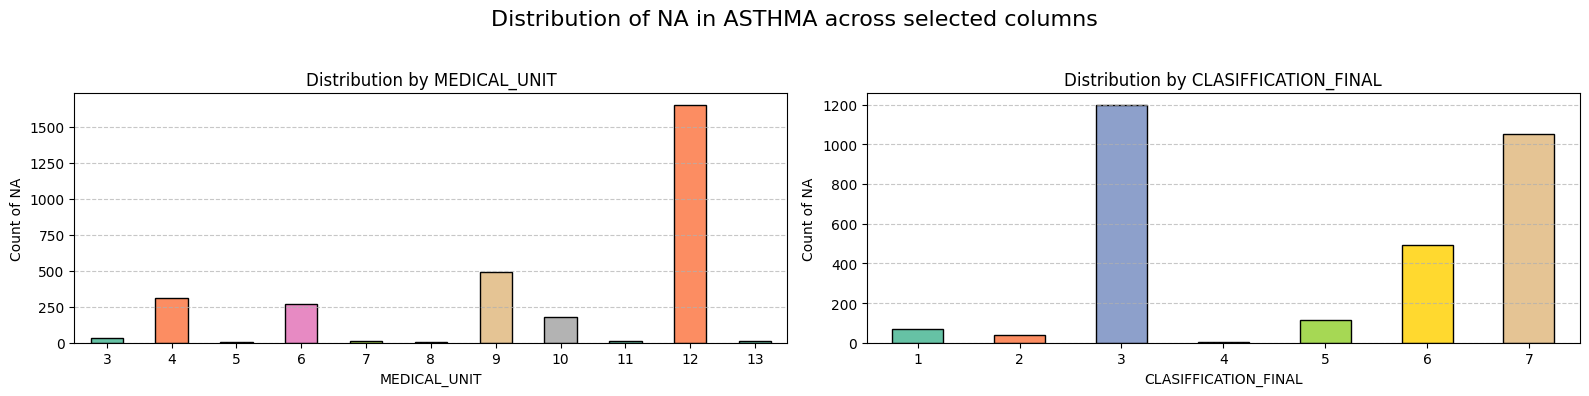

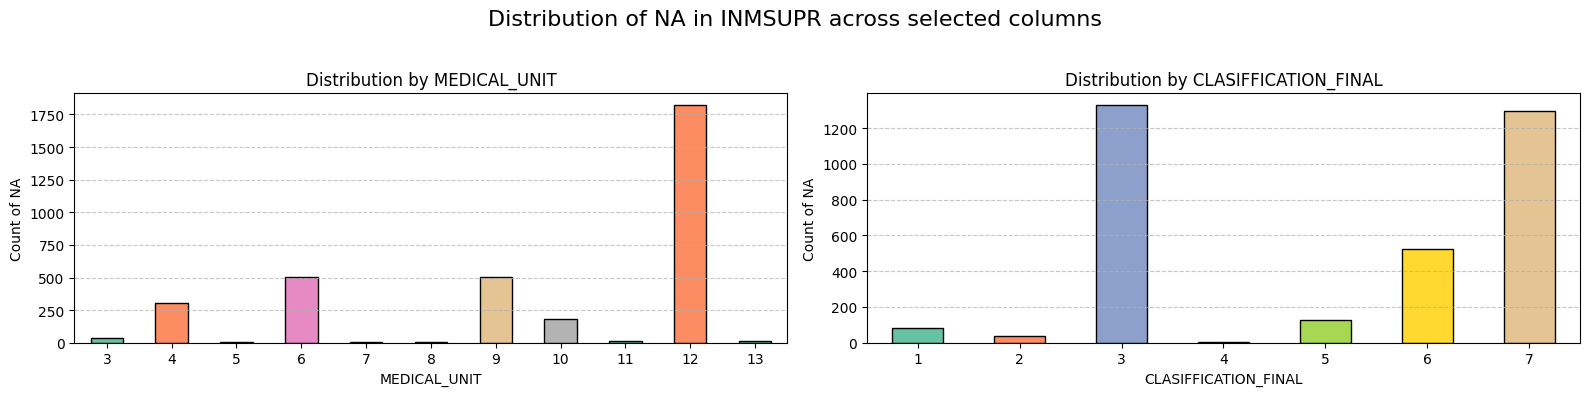

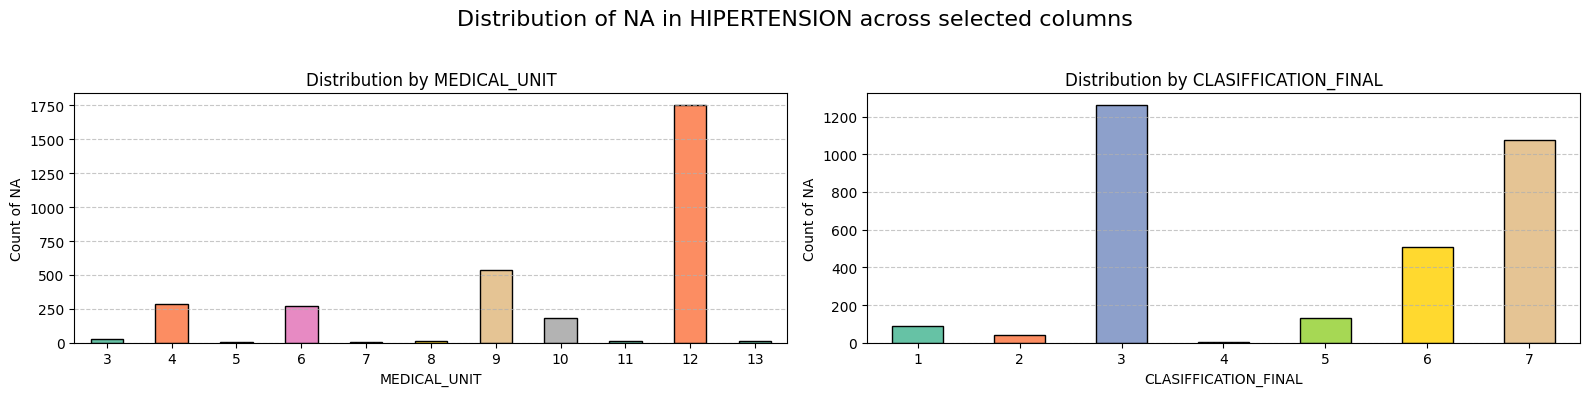

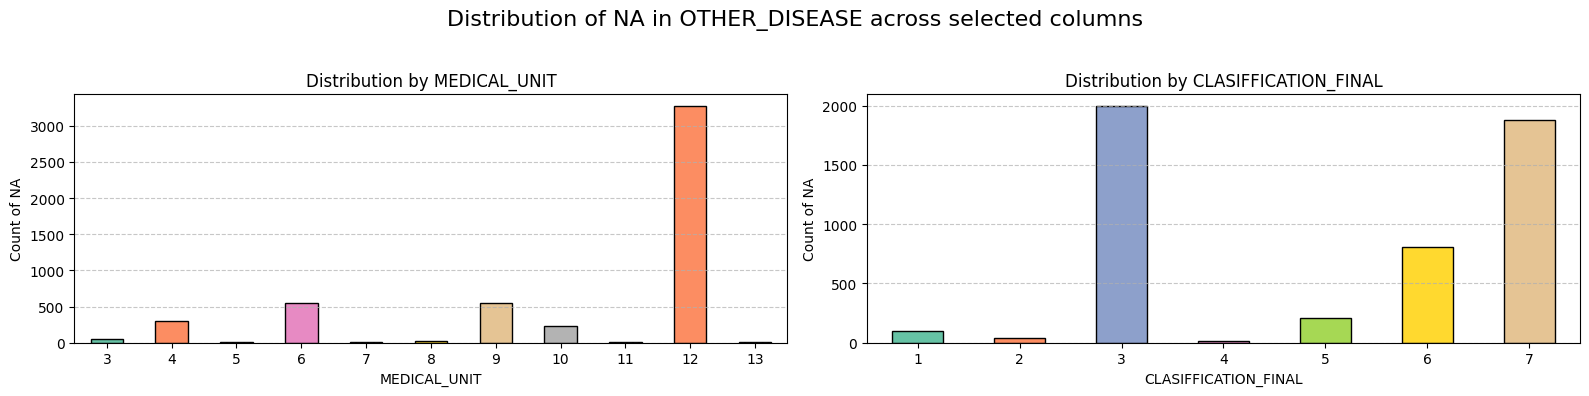

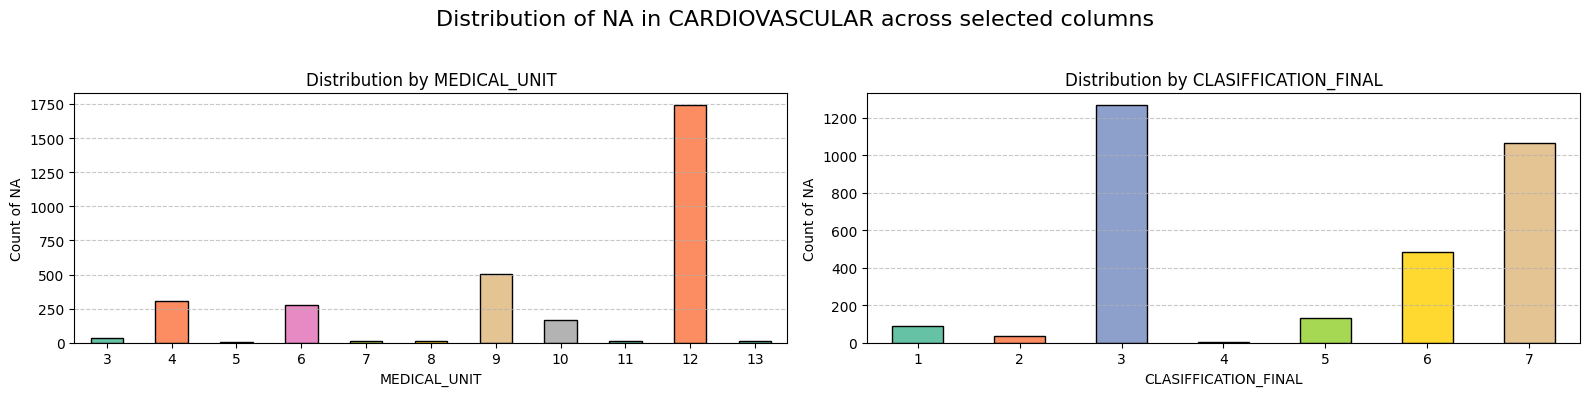

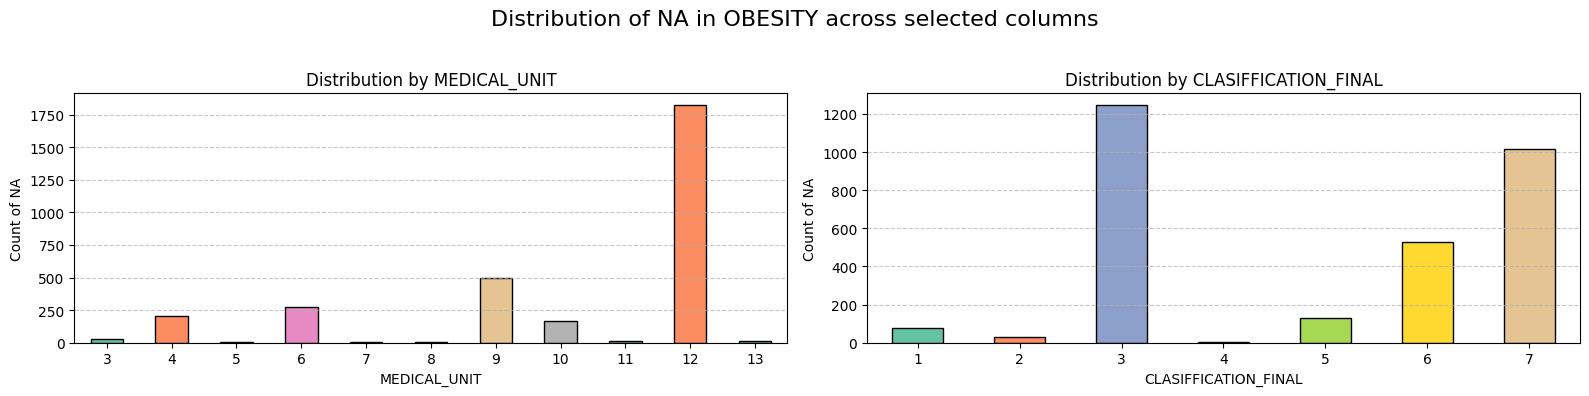

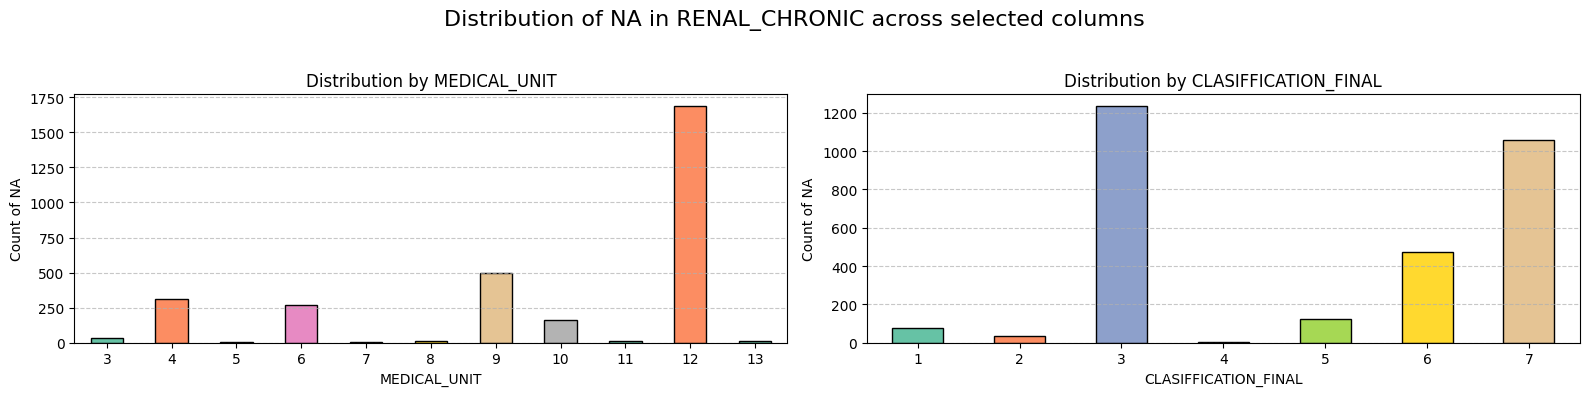

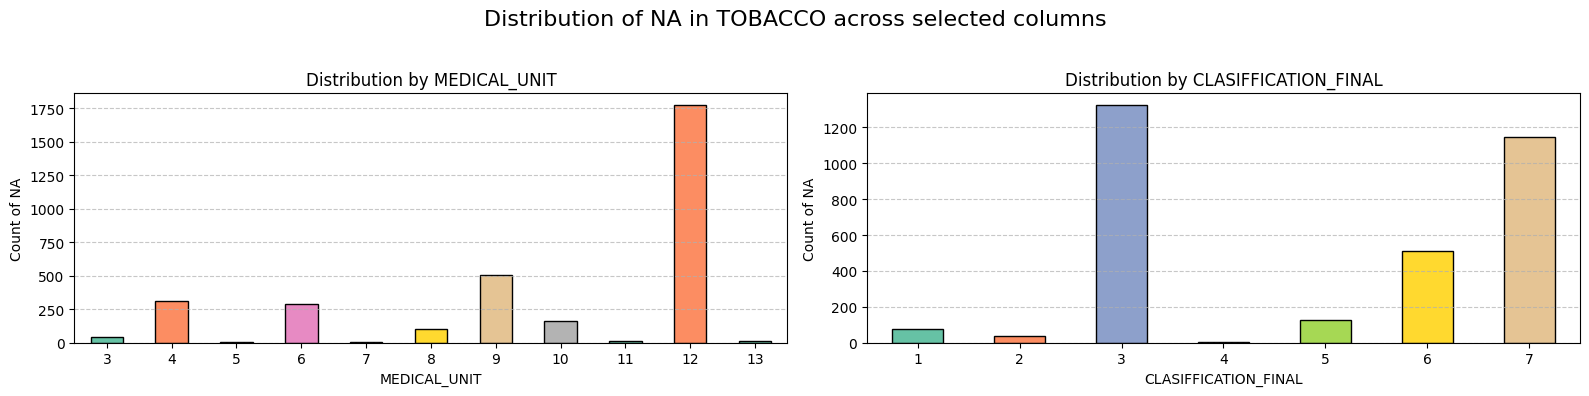

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns

group_columns = ['MEDICAL_UNIT', 'CLASIFFICATION_FINAL']

# Create a color palette for plotting
color_palette = sns.color_palette("Set2", n_colors=10)  # Adjust the number of colors as needed

# Iterate through the boolean columns
for col in boolean:
    temp = df_NA[df_NA[col].isna()]  # Filter rows where the current boolean column has NA

    # Check if all columns in group_columns exist in temp
    available_columns = [grp_col for grp_col in group_columns if grp_col in temp.columns]

    if available_columns:
        # Create subplots
        fig, axes = plt.subplots(ncols=len(available_columns), figsize=(16, 4))
        fig.suptitle(f"Distribution of NA in {col} across selected columns", fontsize=16)

        # Ensure axes is iterable (handles single subplot cases)
        if len(available_columns) == 1:
            axes = [axes]

        for ax, grp_col in zip(axes, available_columns):
            # Calculate value counts for the current column
            counts = temp[grp_col].value_counts()
            counts = counts.sort_index(key=lambda x: x.astype(int))
            unique_values = len(counts.index)

            # Plot a vertical bar chart
            counts.plot(
                kind='bar', 
                ax=ax, 
                color='lightblue', 
                edgecolor='black'
            )
            ax.set_title(f"Distribution by {grp_col}")
            ax.set_xlabel(grp_col)
            ax.set_ylabel("Count of NA")
            ax.grid(axis='y', linestyle='--', alpha=0.7)
            ax.set_xticks(range(len(counts.index)))
            ax.set_xticklabels(counts.index, rotation=0)  # Remove rotation

        plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit title
        plt.show()


In [127]:
%pip install miceforest

Note: you may need to restart the kernel to use updated packages.


In [128]:
df.dtypes

USMER                    int64
MEDICAL_UNIT             int64
SEX                     object
PATIENT_TYPE            object
PNEUMONIA               object
AGE                      int64
PREGNANT                object
DIABETES                object
COPD                    object
ASTHMA                  object
INMSUPR                 object
HIPERTENSION            object
OTHER_DISEASE           object
CARDIOVASCULAR          object
OBESITY                 object
RENAL_CHRONIC           object
TOBACCO                 object
CLASIFFICATION_FINAL     int64
DIED                     int64
dtype: object

In [133]:
df['SEX'].replace({'Female': 0, 'Male': 1},inplace=True)
df['PATIENT_TYPE'].replace({'Returned Home': 0, 'Hospitalization': 1},inplace=True)

/var/folders/t6/qcyvz2zx1n51jtj_nzvvn2b80000gn/T/ipykernel_37112/2218440261.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['SEX'].replace({'Female': 0, 'Male': 1},inplace=True)
/var/folders/t6/qcyvz2zx1n51jtj_nzvvn2b80000gn/T/ipykernel_37112/2218440261.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['PATIENT_TYPE'].replace({'Returned Home': 0, 'Hospitalization': 1},inplace=True)


In [140]:
# Get all columns with dtype 'object'
object_columns = df.select_dtypes(include=['object']).columns

# Convert object columns to int64, handling non-finite values
for col in object_columns:
    try:
        # Replace non-finite values with a placeholder, such as 0
        df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numeric, coercing invalid values to NaN
    except Exception as e:
        print(f"Could not convert column '{col}': {e}")


In [141]:
df.dtypes

USMER                     int64
MEDICAL_UNIT              int64
SEX                       int64
PATIENT_TYPE              int64
PNEUMONIA               float64
AGE                       int64
PREGNANT                float64
DIABETES                float64
COPD                    float64
ASTHMA                  float64
INMSUPR                 float64
HIPERTENSION            float64
OTHER_DISEASE           float64
CARDIOVASCULAR          float64
OBESITY                 float64
RENAL_CHRONIC           float64
TOBACCO                 float64
CLASIFFICATION_FINAL      int64
DIED                      int64
dtype: object

In [142]:
from miceforest import ImputationKernel

mice_kernel = ImputationKernel(
data = df,
random_state = 2023
)

In [143]:
df.isna().sum()

USMER                       0
MEDICAL_UNIT                0
SEX                         0
PATIENT_TYPE                0
PNEUMONIA               16003
AGE                         0
PREGNANT                 3754
DIABETES                 3338
COPD                     3003
ASTHMA                   2979
INMSUPR                  3404
HIPERTENSION             3104
OTHER_DISEASE            5045
CARDIOVASCULAR           3076
OBESITY                  3032
RENAL_CHRONIC            3006
TOBACCO                  3220
CLASIFFICATION_FINAL        0
DIED                        0
dtype: int64

In [144]:
mice_kernel.mice(2)
mice_imputation = mice_kernel.complete_data()
mice_imputation.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,DIED
0,2,1,0,0,1.0,65,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3,1
1,2,1,1,0,1.0,72,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,5,1
2,2,1,1,1,0.0,55,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,1
3,2,1,0,0,0.0,53,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,1
4,2,1,1,0,0.0,68,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3,1


In [146]:
type(mice_imputation)

pandas.core.frame.DataFrame

In [153]:
for item in mice_imputation:
    print(mice_imputation[item].value_counts(),'\n')

USMER
2    662903
1    385672
Name: count, dtype: int64 

MEDICAL_UNIT
12    602995
4     314405
6      40584
9      38116
3      19175
8      10399
10      7873
5       7244
11      5577
13       996
7        891
2        169
1        151
Name: count, dtype: int64 

SEX
0    525064
1    523511
Name: count, dtype: int64 

PATIENT_TYPE
0    848544
1    200031
Name: count, dtype: int64 

PNEUMONIA
0.0    905671
1.0    142904
Name: count, dtype: int64 

AGE
30     27010
31     25927
28     25313
29     25134
34     24872
       ...  
114        2
116        2
111        1
121        1
113        1
Name: count, Length: 121, dtype: int64 

PREGNANT
2.0    523511
0.0    516882
1.0      8182
Name: count, dtype: int64 

DIABETES
0.0    923032
1.0    125543
Name: count, dtype: int64 

COPD
0.0    1033447
1.0      15128
Name: count, dtype: int64 

ASTHMA
0.0    1016917
1.0      31658
Name: count, dtype: int64 

INMSUPR
0.0    1034349
1.0      14226
Name: count, dtype: int64 

HIPERTENSION
0.0   

In [154]:
mice_imputation.to_csv(os.path.join(os.getcwd(),'data',"clean.csv"), index=False)


##### Data Exploring

In [1]:
import os
import math
import zipfile
import pprint
from sklearn.model_selection import train_test_split
import altair as alt
import scipy.stats as stats

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn

In [2]:
df = pd.read_csv(os.path.join(os.getcwd(),'data',"clean.csv"))

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
USMER,1048575.0,1.632194,0.482208,1.0,1.0,2.0,2.0,2.0
MEDICAL_UNIT,1048575.0,8.980565,3.723278,1.0,4.0,12.0,12.0,13.0
SEX,1048575.0,0.499259,0.500000,0.0,0.0,0.0,1.0,1.0
PATIENT_TYPE,1048575.0,0.190765,0.392904,0.0,0.0,0.0,0.0,1.0
PNEUMONIA,1048575.0,0.136284,0.343090,0.0,0.0,0.0,0.0,1.0
AGE,1048575.0,41.794102,16.907389,0.0,30.0,40.0,53.0,121.0
PREGNANT,1048575.0,1.006322,0.996071,0.0,0.0,1.0,2.0,2.0
DIABETES,1048575.0,0.119727,0.324642,0.0,0.0,0.0,0.0,1.0
COPD,1048575.0,0.014427,0.119244,0.0,0.0,0.0,0.0,1.0
ASTHMA,1048575.0,0.030191,0.171114,0.0,0.0,0.0,0.0,1.0


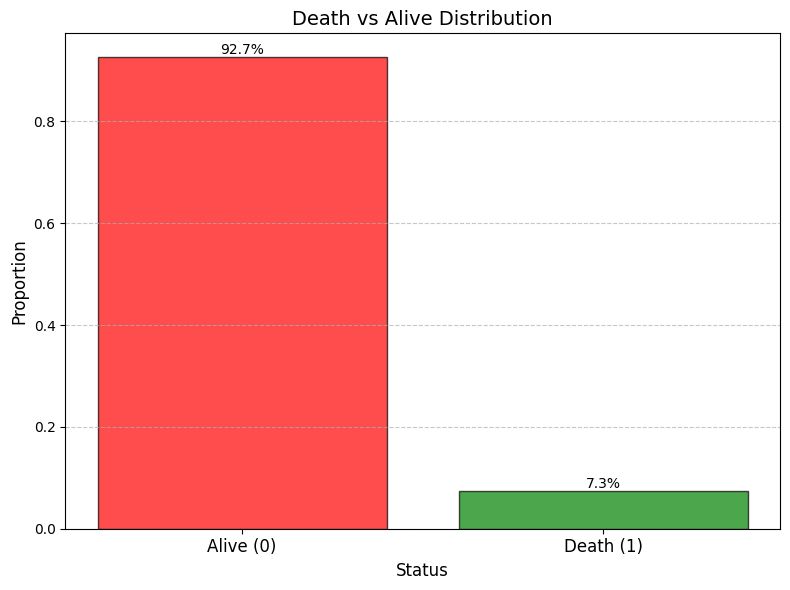

The ratio between Alive (Negative) and Death (Positive) is 12.628


In [4]:
# Calculate normalized value counts
died_counts = df['DIED'].value_counts(normalize=True)

# Create a bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(died_counts.index.astype(str), died_counts.values, color=['red', 'green'], alpha=0.7, edgecolor='black')

# Customize the x-axis labels
plt.xticks([0, 1], ['Alive (0)', 'Death (1)'], fontsize=12)

# Add percentage labels on top of the bars
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f'{bar.get_height() * 100:.1f}%',
        ha='center',
        va='bottom',
        fontsize=10
    )

# Add labels and title
plt.xlabel('Status', fontsize=12)
plt.ylabel('Proportion', fontsize=12)
plt.title('Death vs Alive Distribution', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()

print(f"The ratio between Alive (Negative) and Death (Positive) is {(died_counts[0] / died_counts[1]):0.3f}")

Dataset is heavily imbalanced

In [5]:
# df['SEX'].replace({'Female': 0, 'Male': 1},inplace=True)
# df['PATIENT_TYPE'].replace({'Returned Home': 0, 'Hospitalization': 1},inplace=True)
categorical = ['MEDICAL_UNIT', 'PATIENT_TYPE', 'CLASIFFICATION_FINAL', 'USMER', 'SEX']
boolean = ['PNEUMONIA',
 'PREGNANT',
 'DIABETES',
 'COPD',
 'ASTHMA',
 'INMSUPR',
 'HIPERTENSION',
 'OTHER_DISEASE',
 'CARDIOVASCULAR',
 'OBESITY',
 'RENAL_CHRONIC',
 'TOBACCO']

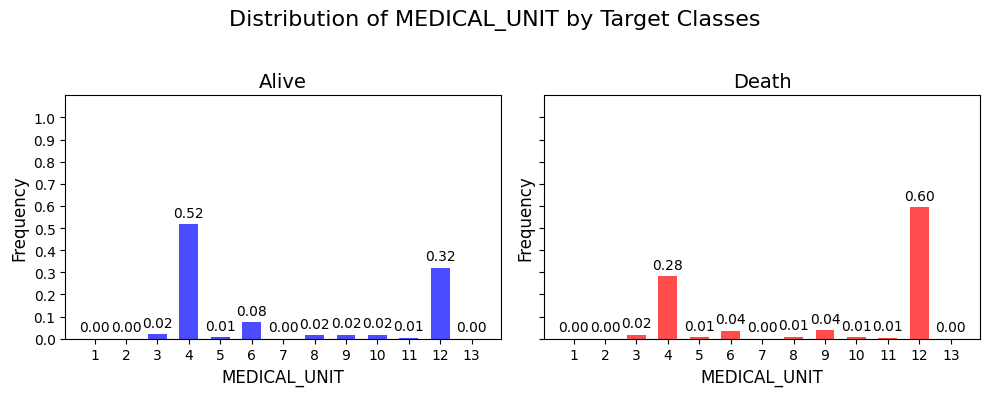

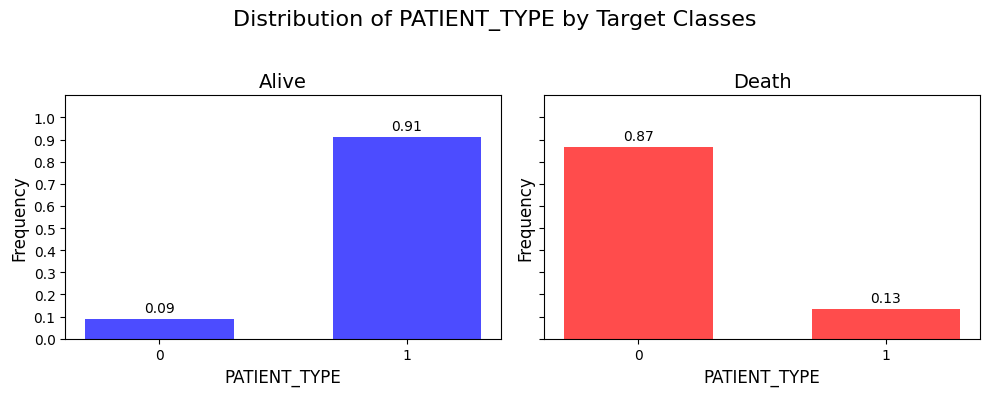

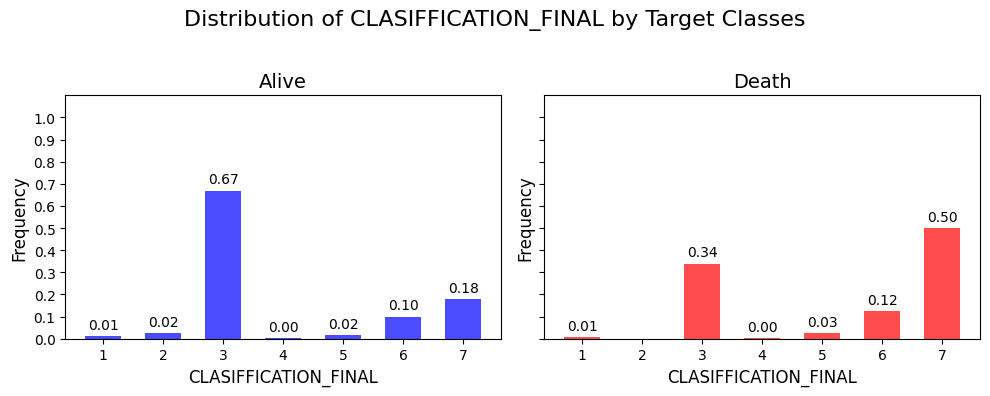

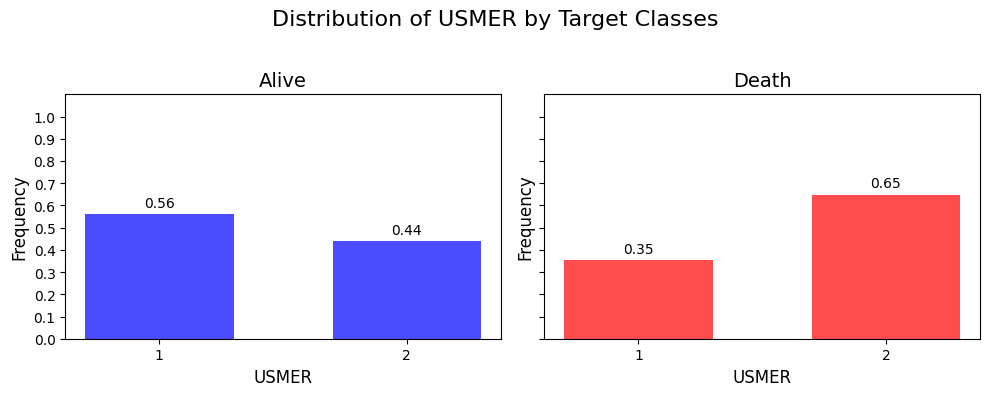

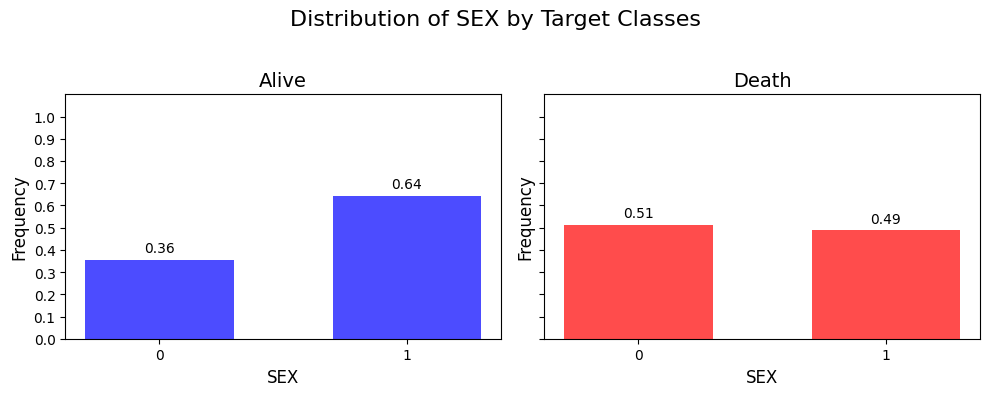

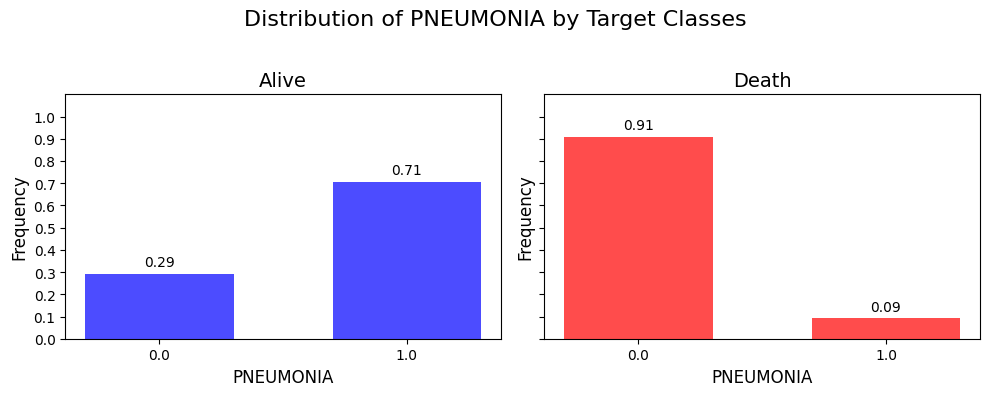

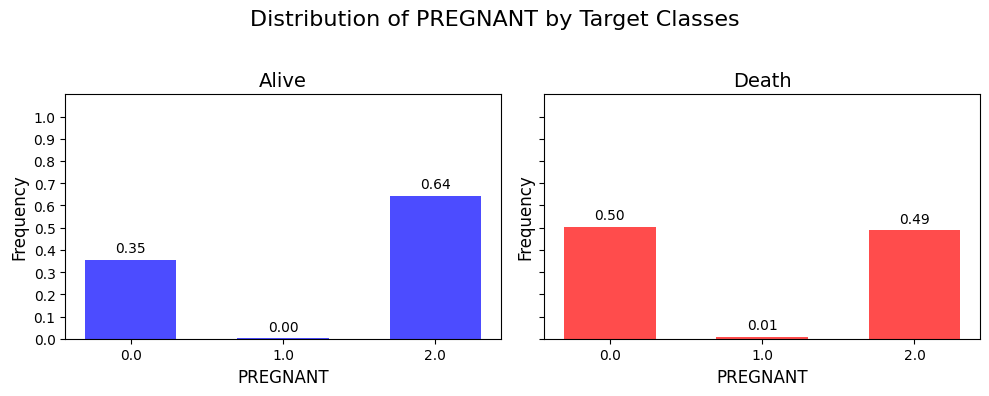

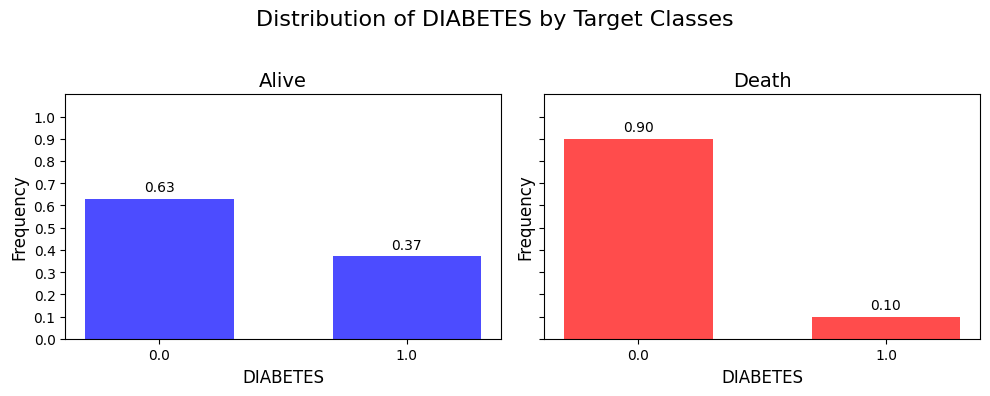

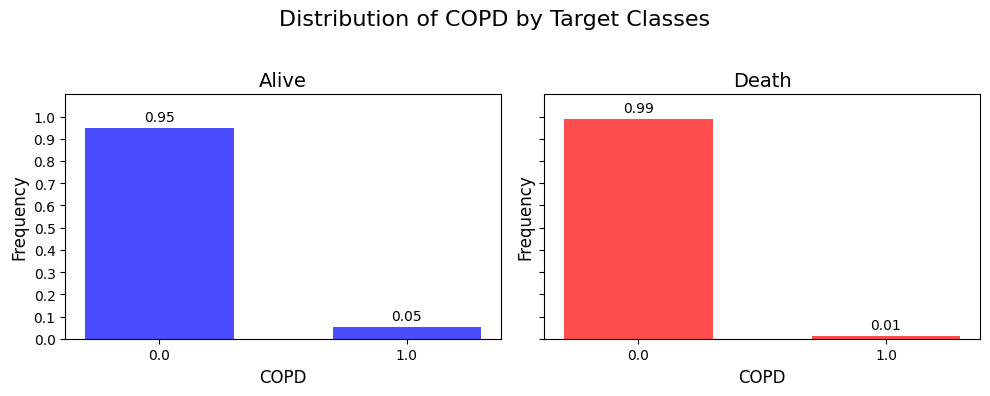

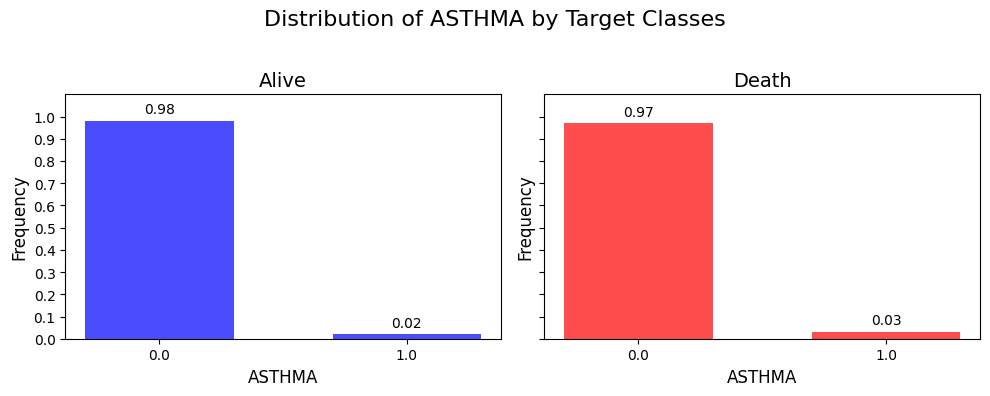

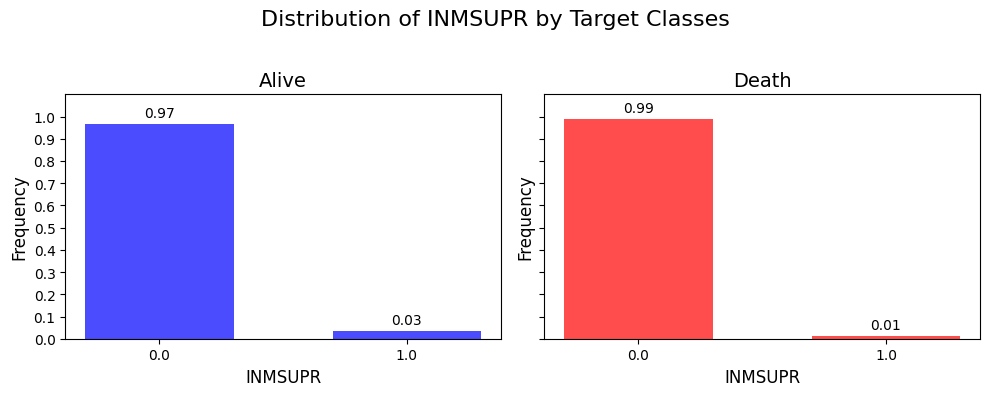

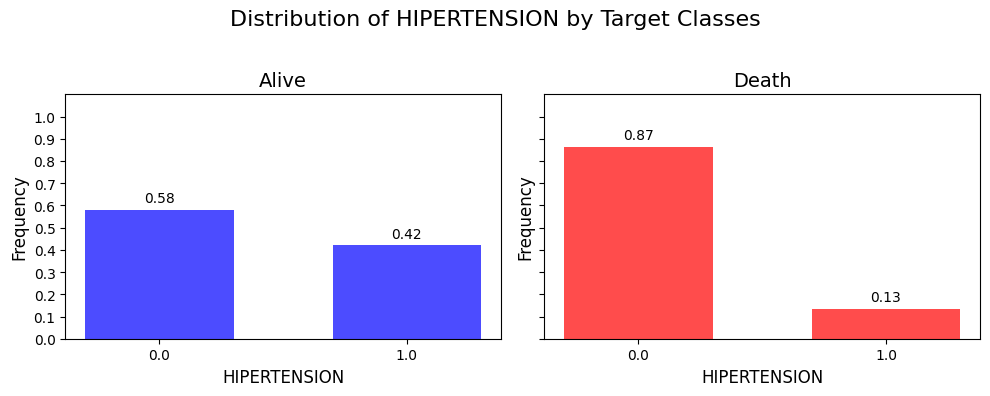

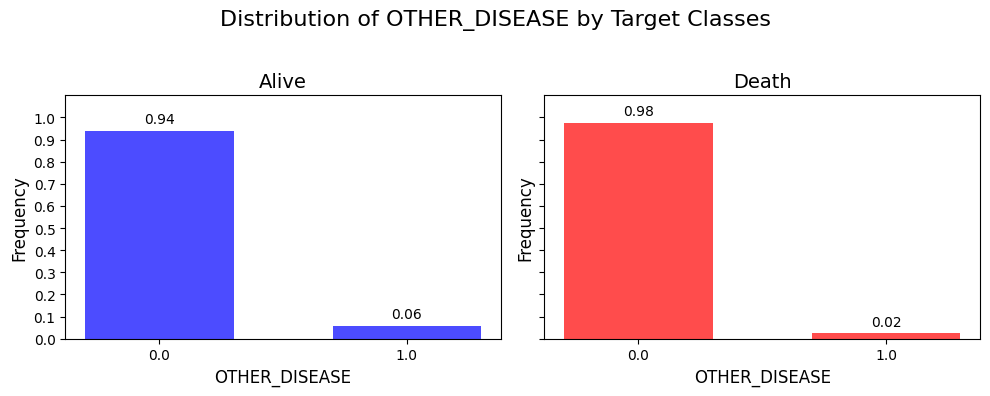

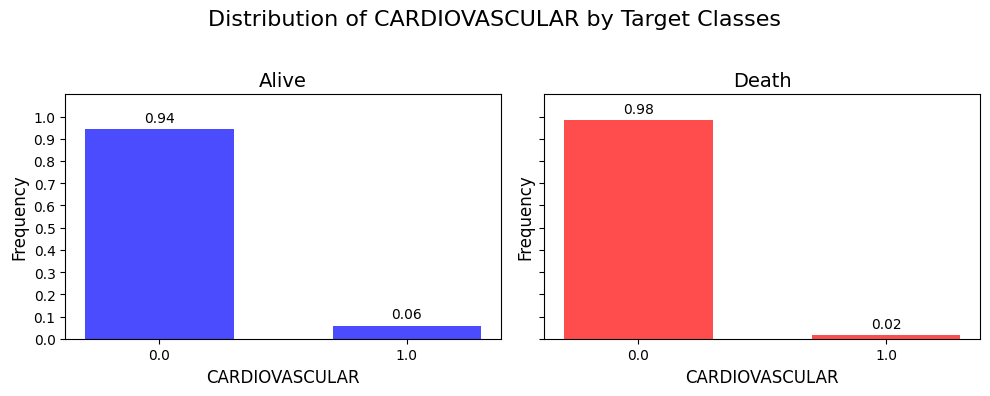

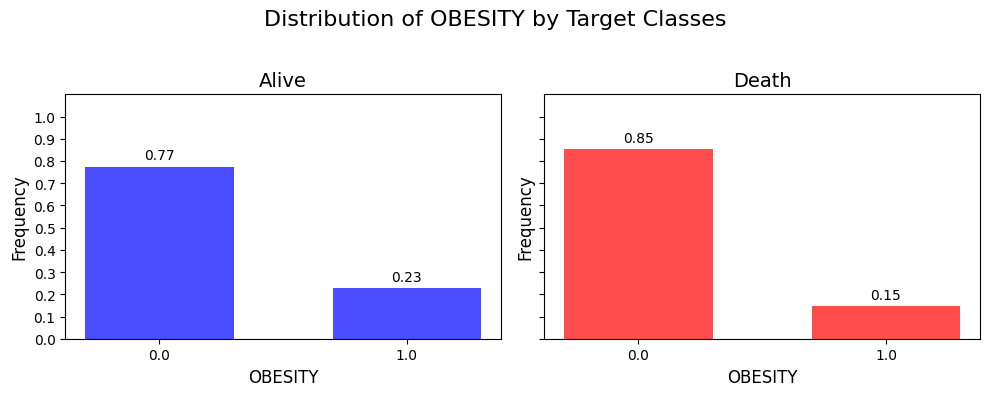

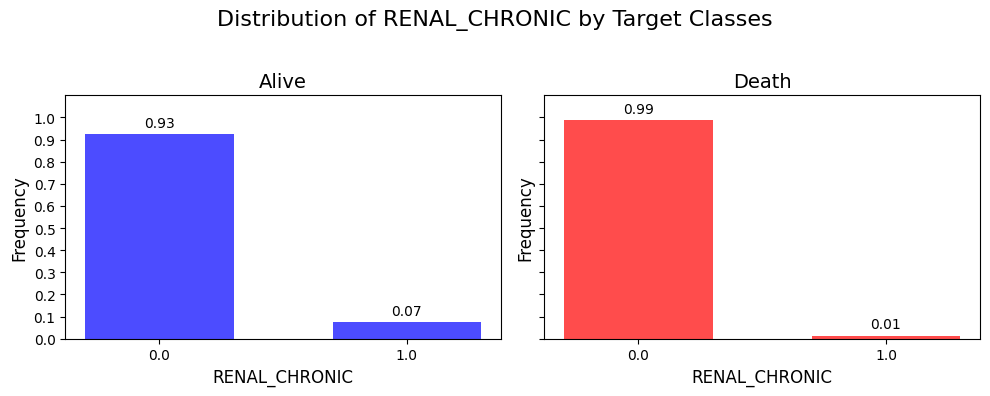

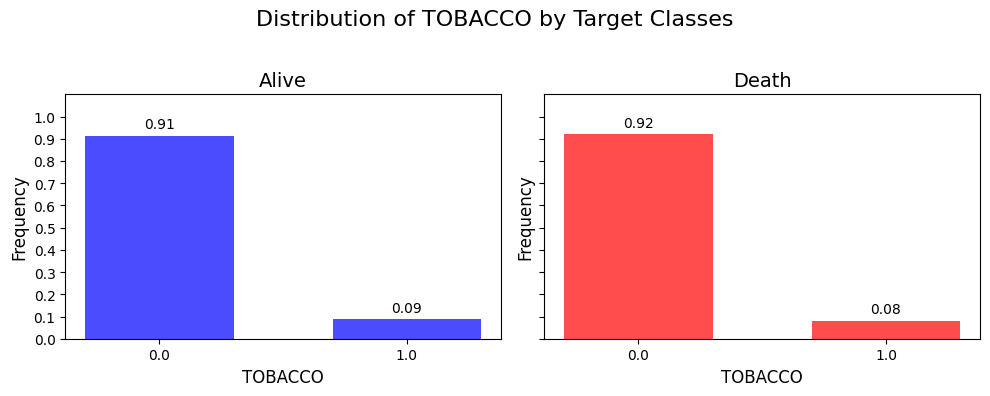

In [6]:
import matplotlib.pyplot as plt

# Define color mapping
colors = {0: 'red', 1: 'blue'}

# Loop through each categorical column
for col in categorical + boolean:
    # Create a figure with two subplots, one for each class
    fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True)
    fig.suptitle(f"Distribution of {col} by Target Classes", fontsize=16)
    
    unique_categories = sorted(df[col].unique())
    x_positions = range(len(unique_categories))
    
    for idx, label in enumerate(df['DIED'].unique()):
        subset = df[df['DIED'] == label][col].value_counts(normalize=True)
        
        # Align categories and ensure consistent order
        values = [subset.get(category, 0) for category in unique_categories]
        
        # Plot for each class
        bars = axes[idx].bar(
            x_positions,
            values,
            color=colors[label],
            alpha=0.7,
            width=0.6
        )
        
        # Add text above each bar
        for bar, value in zip(bars, values):
            axes[idx].text(
                bar.get_x() + bar.get_width() / 2,  # x position (center of bar)
                bar.get_height() + 0.02,           # y position (slightly above bar)
                f"{value:.2f}" if value != 0 else "",                    # formatted value
                ha='center', va='bottom', fontsize=10
            )
        
        axes[idx].set_title(f"{'Alive' if label == 1 else 'Death'}", fontsize=14)
        axes[idx].set_xticks(x_positions)
        axes[idx].set_xticklabels(unique_categories, rotation=0, ha='center')
        axes[idx].set_xlabel(col, fontsize=12)
        axes[idx].set_ylabel("Frequency", fontsize=12)
        axes[idx].set_ylim(0, 1.1)
        axes[idx].set_yticks([i * 0.1 for i in range(11)])
    
    # Adjust layout and show the plot
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


##### AGE feature

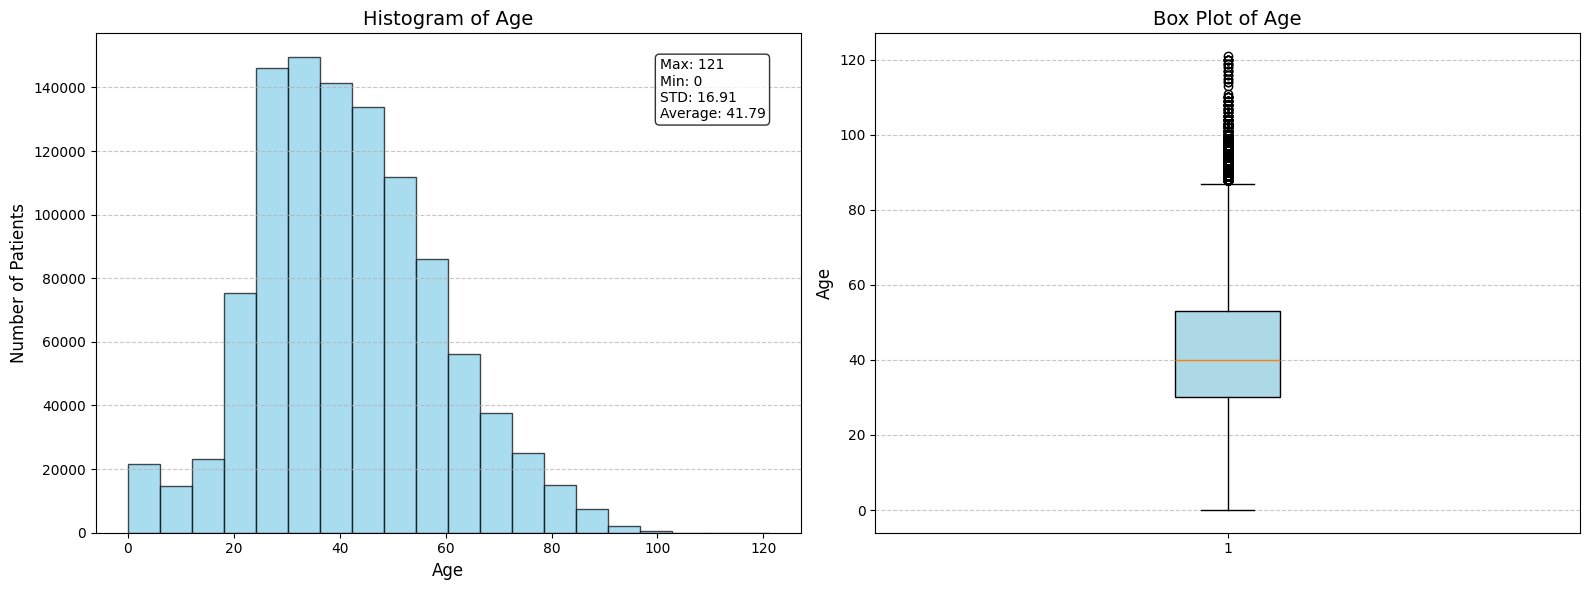

In [7]:
age_stats={
    "Max": df['AGE'].max(),
    "Min": df['AGE'].min(),
    "STD": df['AGE'].std(),
    "Average": df['AGE'].mean()
}

# Create a figure with side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plotting the histogram for the 'Age' column
axes[0].hist(df['AGE'], bins=20, edgecolor='black', alpha=0.7, color='skyblue')
axes[0].set_xlabel('Age', fontsize=12)
axes[0].set_ylabel('Number of Patients', fontsize=12)
axes[0].set_title('Histogram of Age', fontsize=14)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Add a box with statistics on the histogram
stats_text = '\n'.join([f"{key}: {value:.2f}" if key in ["Average", "STD"] else f"{key}: {value}" for key, value in age_stats.items()])
props = dict(boxstyle='round', facecolor='white', alpha=0.8)
axes[0].text(
    0.95,
    0.95,
    stats_text,
    fontsize=10,
    bbox=props,
    verticalalignment='top',
    horizontalalignment='right',
    transform=axes[0].transAxes,
    multialignment='left'
)

# Plotting the vertical box plot
axes[1].boxplot(df['AGE'], vert=True, patch_artist=True, boxprops=dict(facecolor='lightblue', color='black'))
axes[1].set_title('Box Plot of Age', fontsize=14)
axes[1].set_ylabel('Age', fontsize=12)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


From the histogram, the patient's age distribution seems to follow a normal distribution

The Boxplot shows some values lie outside of the maximum value. This indicates there are outliers in the dataset

In healthcare data, outliers like extremely old or young ages could be highly predictive of high-risk outcomes (e.g., infants or the elderly).

In [8]:
# Example: Calculate percentage of outliers in the 'AGE' column
Q1 = df['AGE'].quantile(0.25)
Q3 = df['AGE'].quantile(0.75)
IQR = Q3 - Q1

# Calculate lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['AGE'] < lower_bound) | (df['AGE'] > upper_bound)]

# Calculate percentage of outliers
percentage_outliers = (len(outliers) / len(df)) * 100

print(f"Percentage of outliers in the 'AGE' column: {percentage_outliers:.2f}%")
print(f"Upper bound:", upper_bound)
print(f"Lower bound:", lower_bound)

Percentage of outliers in the 'AGE' column: 0.54%
Upper bound: 87.5
Lower bound: -4.5


The extreme ages are too sparse to contribute much predictive value but still valid so we decided to handle outliers by the technique: Capping

In [9]:
df['AGE'] = df['AGE'].clip(lower_bound, upper_bound)

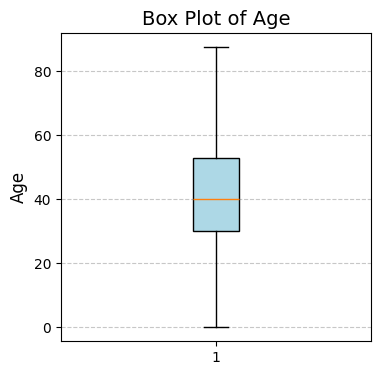

In [10]:
plt.figure(figsize=(4, 4))
plt.boxplot(df['AGE'], vert=True, patch_artist=True, boxprops=dict(facecolor='lightblue', color='black'))

plt.title('Box Plot of Age', fontsize=14)
plt.ylabel('Age', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

##### Correlation

In [11]:
%pip install altair

Note: you may need to restart the kernel to use updated packages.


In [12]:
numeric_df = df.select_dtypes(include=['int64','float64'])
cor_data = numeric_df.corr().stack().reset_index().rename(
    columns = {0: 'Correlation',
               'level_0': 'Variable 1',
               'level_1': 'Variable 2'}
)
cor_data['Correlation'] = cor_data['Correlation'].map('{:.2f}'.format)
cor_data['Correlation'] = pd.to_numeric(cor_data['Correlation'])

base = alt.Chart(cor_data).encode(
    x = 'Variable 1',
    y = 'Variable 2'
)

text = base.mark_text().encode(
    text='Correlation',
    color = alt.condition(
        alt.datum.correlation > 0.5,
        alt.value('white'),
        alt.value('black')
    )
)

cor_plot = base.mark_rect().encode(
    color='Correlation:Q'
)

(cor_plot + text).properties(
    width=700,
    height=400
)

alt.LayerChart(...)

In [13]:
died_cor = cor_data[cor_data['Variable 1'] == 'DIED']
died_significant = died_cor[(died_cor['Correlation'].abs() > 0.05) | (died_cor['Correlation'] == 1)]
significant_cor = died_significant['Variable 2'].tolist()

unsignificant_cor = list(set(df.columns.values.tolist()) - set(significant_cor))

print("Significant variables: ", significant_cor)

print("Unsignificant variables: ", unsignificant_cor)

Significant variables:  ['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC', 'CLASIFFICATION_FINAL', 'DIED']
Unsignificant variables:  ['ASTHMA', 'INMSUPR', 'TOBACCO']


In [14]:
df.drop(columns=['SEX'],inplace=True)

##### Data Encoding

In [15]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

categorical_cols = ['MEDICAL_UNIT', 'CLASIFFICATION_FINAL', 'PREGNANT']

df_categorical = encoder.fit_transform(df[categorical_cols])
categorical_names = encoder.get_feature_names_out(categorical_cols)
df_categorical = pd.DataFrame(df_categorical,columns = categorical_names)

df = df.drop(categorical_cols, axis=1)
df = df.reset_index(drop=True)
df = pd.concat([df, df_categorical], axis=1)

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
USMER,1048575.0,1.632194,0.482208,1.0,1.0,2.0,2.0,2.0
PATIENT_TYPE,1048575.0,0.190765,0.392904,0.0,0.0,0.0,0.0,1.0
PNEUMONIA,1048575.0,0.136284,0.343090,0.0,0.0,0.0,0.0,1.0
AGE,1048575.0,41.772277,16.843262,0.0,30.0,40.0,53.0,87.5
DIABETES,1048575.0,0.119727,0.324642,0.0,0.0,0.0,0.0,1.0
COPD,1048575.0,0.014427,0.119244,0.0,0.0,0.0,0.0,1.0
ASTHMA,1048575.0,0.030191,0.171114,0.0,0.0,0.0,0.0,1.0
INMSUPR,1048575.0,0.013567,0.115685,0.0,0.0,0.0,0.0,1.0
HIPERTENSION,1048575.0,0.155828,0.362692,0.0,0.0,0.0,0.0,1.0
OTHER_DISEASE,1048575.0,0.026851,0.161647,0.0,0.0,0.0,0.0,1.0


##### Data Splitting

In [17]:
train_df, test_df = train_test_split(df, test_size=0.3, random_state=42)

In [18]:
X_train = train_df.drop(columns=['DIED'])

y_train = train_df['DIED']

X_test = test_df.drop(columns=['DIED'])

y_test = test_df['DIED']


##### Pipeline

In [19]:
%pip install imblearn xgboost

Note: you may need to restart the kernel to use updated packages.


In [20]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import itertools
from sklearn.decomposition import PCA
from sklearn.ensemble import HistGradientBoostingClassifier
from imblearn.ensemble import BalancedBaggingClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_validate
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import RandomUnderSampler

In [30]:
#from sklearn.metrics import geometric_mean_score
from sklearn.metrics import make_scorer
from sklearn.metrics import fbeta_score
from sklearn.metrics import average_precision_score
Scoring_met = {
  'F2': make_scorer(fbeta_score, beta=2),
  'F1': 'f1',
  'Accuracy': 'accuracy',
  'Balanced Accuracy': 'balanced_accuracy',
  'PR_Auc': make_scorer(average_precision_score)
}

def generate_pipes_dict(pipe_dict):
    result = {}
    for config, steps in pipe_dict.items():
        
        #result[config] = generate_pipes(steps)
        result[config]= generate_pipes(steps)
    return result

def generate_pipes(pipe_config):
  
  pipe_config = [list(step.items()) for _, step in pipe_config]
  pipe_config = list(itertools.product(*pipe_config))
  pipe_names = list(map(lambda steps: [name for name,_ in steps], pipe_config))
  pipe_names = list(map(lambda L: ">".join(L), pipe_names))
  pipes = [Pipeline(cfg) for cfg in pipe_config]
  temp = zip(pipe_names, pipes)
  return dict(temp)

def find_hyperparams(pipe_mapper_dict):
  print("Start the tunning process ...")
  best_pipes = {}
  results = []
  counter = 0
  for name, pipe_mapper in pipe_mapper_dict.items():
   
    for idx, pipe_name in enumerate(list(pipe_mapper.keys())):
        #if counter == 2:
        #break
        print(f"{idx + 1}. Tuning pipe: {pipe_name}")

        # Select parameters related to the current pipeline:
        param_grid = {}
        for step_name in pipe_name.split('>'):
            for param_name in parameters.keys():
                if param_name.split("__")[0] == (step_name):
                    param_grid[param_name] = parameters[param_name]

        # Create a finder and search for the best parameters
        pipe = pipe_mapper[pipe_name]
        finder = GridSearchCV(pipe, param_grid=param_grid, cv=5,
                            scoring= Scoring_met,
                            refit= 'PR_Auc')

        finder.fit(X_train, y_train)
        print("\t best-params: {:>15s}".format(str(finder.best_params_)))
        print(f"\t best-score (PR_Auc): {finder.best_score_:15.2f}")
        #print(f"\t cv_result_: {finder.cv_results_}")
        print()

        # Store best pipe
        best_pipes[pipe_name] = finder.best_estimator_

        # Add results to a dataframe
        rs_item = {"Method": pipe_name, "PR_Auc": finder.best_score_}
        for key, value in finder.best_params_.items():
            rs_item[key] = value
        results.append(rs_item)

        #counter +=1

  print("The tunning is done!")
  tuned_table = pd.DataFrame(results)
  tuned_table.set_index('Method')
  return tuned_table, best_pipes

In [24]:
# Define methods for scaling features
up_samplers = {
    "SMOTE": SMOTE()
}

under_samplers = {
    "RandomUnderSampler": RandomUnderSampler()
}

combine_samplers = {
    "SMOTETomek": SMOTETomek(sampling_strategy='auto'),
    "SMOTEENN": SMOTEENN(sampling_strategy='auto')
}

scalers = {
    "MinMaxScaler": MinMaxScaler(),
    # "StandardScaler": StandardScaler(),
    "MaxAbsScaler": MaxAbsScaler()
}

reducers = {
    'PCA': PCA()
}

# Define methods for classifying samples
classifiers = {

    "XGBClassifier": XGBClassifier(random_state=42,n_jobs=4,objective= 'binary:logistic',eval_metric = Scoring_met['PR_Auc'],seed=0, device='cpu'),

}

pipe_dict = {
    "config_up": [
        ('up_samplers', up_samplers),
        ('scalers', scalers),
        ('reducers', reducers),
        ('classifiers', classifiers)
    ],
    "config_down": [
        ('under_samplers', under_samplers),
        ('scalers', scalers),
        ('reducers', reducers),
        ('classifiers', classifiers)
    ],
    "config_up_down": [
        ('up_samplers', up_samplers),
        ('under_samplers', under_samplers),
        ('scalers', scalers),
        ('reducers', reducers),
        ('classifiers', classifiers)
    ]
}

pipe_dict_2 = {
    "config_combine": [
        ('combine_samplers', combine_samplers),
        ('scalers', scalers),
        ('reducers', reducers),
        ('classifiers', classifiers)
    ]
}

# Define parameters for each method
parameters = {
    "MinMaxScaler__feature_range": [(-1,1)],
    # "StandardScaler__with_mean": [True, False],
    # "StandardScaler__with_std": [True, False],
    "PCA__n_components": [0.95],
    "SMOTE__sampling_strategy": [0.1,0.125,0.2,0.5],
    "RandomUnderSampler__sampling_strategy": [0.5,0.8,1],
    
    "XGBClassifier__n_estimators":[1000], #[100,200,300,500,1000]->200,[160,170,180,190,200]->180,range(170,190,2)->186
    "XGBClassifier__learning_rate": [0.1],
    #Step2: Tune max_depth and min_child_weight together
    "XGBClassifier__max_depth":[5], #range(3,10,2)->5, [4,5,6]->5
    "XGBClassifier__min_child_weight": [1], #range(1,6,2)->1, [1,2]->1
    #Step3: Tune gamma
    "XGBClassifier__gamma": [0], #[i/10.0 for i in range(0,5)]->0
    #Step4: Tune subsample and colsample_bytree together
    "XGBClassifier__subsample": [0.8], #[i/10.0 for i in range(6,10)]->0.8,[i/100.0 for i in range(75,90,5)]->0.8
    "XGBClassifier__colsample_bytree": [0.8], #[i/10.0 for i in range(6,10)]->0.8,[i/100.0 for i in range(75,90,5)]->0.8
    #Step5: Tune reg_alpha
    "XGBClassifier__reg_alpha": [0],#[0, 0.001, 0.005, 0.01, 0.05]->0
    "XGBClassifier__scale_pos_weight": [1]
}


In [ ]:
pipe_mapper_dict = generate_pipes_dict(pipe_dict)
tuned_table, best_pipes = find_hyperparams(pipe_mapper_dict)

Start the tunning process ...
1. Tuning pipe: SMOTE>MinMaxScaler>PCA>XGBClassifier
	 best-params: {'MinMaxScaler__feature_range': (0, 1), 'PCA__n_components': 0.95, 'SMOTE__sampling_strategy': 0.5, 'XGBClassifier__colsample_bytree': 0.8, 'XGBClassifier__gamma': 0, 'XGBClassifier__learning_rate': 0.1, 'XGBClassifier__max_depth': 5, 'XGBClassifier__min_child_weight': 1, 'XGBClassifier__n_estimators': 1000, 'XGBClassifier__reg_alpha': 0, 'XGBClassifier__scale_pos_weight': 1, 'XGBClassifier__subsample': 0.8}
	 best-score (PR_Auc):            0.39

2. Tuning pipe: SMOTE>StandardScaler>PCA>XGBClassifier
	 best-params: {'PCA__n_components': 0.9, 'SMOTE__sampling_strategy': 0.5, 'StandardScaler__with_mean': True, 'StandardScaler__with_std': True, 'XGBClassifier__colsample_bytree': 0.8, 'XGBClassifier__gamma': 0, 'XGBClassifier__learning_rate': 0.1, 'XGBClassifier__max_depth': 5, 'XGBClassifier__min_child_weight': 1, 'XGBClassifier__n_estimators': 1000, 'XGBClassifier__reg_alpha': 0, 'XGBClassi

In [25]:
pipe_mapper_dict_2 = generate_pipes_dict(pipe_dict_2)
tuned_table_2 , best_pipes_2 = find_hyperparams(pipe_mapper_dict_2)

Start the tunning process ...
1. Tuning pipe: SMOTETomek>MinMaxScaler>PCA>XGBClassifier
	 best-params: {'MinMaxScaler__feature_range': (-1, 1), 'PCA__n_components': 0.95, 'XGBClassifier__colsample_bytree': 0.8, 'XGBClassifier__gamma': 0, 'XGBClassifier__learning_rate': 0.1, 'XGBClassifier__max_depth': 5, 'XGBClassifier__min_child_weight': 1, 'XGBClassifier__n_estimators': 1000, 'XGBClassifier__reg_alpha': 0, 'XGBClassifier__scale_pos_weight': 1, 'XGBClassifier__subsample': 0.8}
	 best-score (PR_Auc):            0.38

2. Tuning pipe: SMOTETomek>MaxAbsScaler>PCA>XGBClassifier
	 best-params: {'PCA__n_components': 0.95, 'XGBClassifier__colsample_bytree': 0.8, 'XGBClassifier__gamma': 0, 'XGBClassifier__learning_rate': 0.1, 'XGBClassifier__max_depth': 5, 'XGBClassifier__min_child_weight': 1, 'XGBClassifier__n_estimators': 1000, 'XGBClassifier__reg_alpha': 0, 'XGBClassifier__scale_pos_weight': 1, 'XGBClassifier__subsample': 0.8}
	 best-score (PR_Auc):            0.38

3. Tuning pipe: SMOTEENN

In [32]:
# Define methods for scaling features
up_samplers = {
    "SMOTE": SMOTE(sampling_strategy=0.2)
}

under_samplers = {
    "RandomUnderSampler": RandomUnderSampler(sampling_strategy=0.5)
}

scalers = {
    "MinMaxScaler": MinMaxScaler(feature_range=(-1,1))
}

reducers = {
    'PCA': PCA(n_components=0.95)
}

# Define methods for classifying samples
classifiers = {

    "XGBClassifier": XGBClassifier(random_state=42,n_jobs=2,objective= 'binary:logistic',eval_metric = Scoring_met['PR_Auc'],seed=0, device='cpu'),

}

pipe_steps = [('up_samplers', up_samplers),
        ('under_samplers', under_samplers),
        ('scalers', scalers),
        ('reducers', reducers),
        ('classifiers', classifiers)]

In [63]:
# Define parameters for each method
parameters = {
    "XGBClassifier__n_estimators":[258], #[100,200,300,500,1000]->300,[240,260,280,300,320,340,360]->260,range(250, 271, 2)->258
    #Step7: Reduce learning rate
    "XGBClassifier__learning_rate": [0.07], #range(1,11) -> 0.07
    #Step2: Tune max_depth and min_child_weight together
    "XGBClassifier__max_depth":[6], #range(3,10,2)->7, [6,7,8]->6
    "XGBClassifier__min_child_weight": [4], #range(1,6,2)->3, [2,3,4]->4
    #Step3: Tune gamma
    "XGBClassifier__gamma": [0.5], #[i/10.0 for i in range(0,5)]->0.4, [0.4,0.5,0.6]->0.5
    #Step4: Tune subsample and colsample_bytree together
    "XGBClassifier__subsample": [0.69], #[i/10.0 for i in range(6,10)]->0.7,[i/100.0 for i in range(64,77,1)]->0.69
    "XGBClassifier__colsample_bytree": [0.69], #[i/10.0 for i in range(6,10)]->0.7,[i/100.0 for i in range(64,77,1)]->0.69
    #Step5: Tune reg_alpha
    "XGBClassifier__reg_alpha": [0],#[0, 0.001, 0.005, 0.01, 0.05]->0.1, [0,0.01,0.05,0.08,0.1]->0
    #Step6: Tune reg_lambda
    "XGBClassifier__reg_lambda": [0.8], #[0,0.001,0.01,0.1,1,10,100]->1, [0.2,0.5,0.8,1,1.5,3]->0.8
    "XGBClassifier__scale_pos_weight": [1]
}

In [62]:
pipe_mapper_best = generate_pipes_dict({"best_config": pipe_steps})
tuned_table, best_pipes = find_hyperparams(pipe_mapper_best)

Start the tunning process ...
1. Tuning pipe: SMOTE>RandomUnderSampler>MinMaxScaler>PCA>XGBClassifier
	 best-params: {'XGBClassifier__colsample_bytree': 0.69, 'XGBClassifier__gamma': 0.5, 'XGBClassifier__learning_rate': 0.07, 'XGBClassifier__max_depth': 6, 'XGBClassifier__min_child_weight': 4, 'XGBClassifier__n_estimators': 258, 'XGBClassifier__reg_alpha': 0, 'XGBClassifier__reg_lambda': 0.8, 'XGBClassifier__scale_pos_weight': 1, 'XGBClassifier__subsample': 0.69}
	 best-score (PR_Auc):            0.40

The tunning is done!


In [64]:
tuned_table[tuned_table["PR_Auc"] == tuned_table["PR_Auc"].max()].dropna(axis=1)

,Method,PR_Auc,XGBClassifier__colsample_bytree,XGBClassifier__gamma,XGBClassifier__learning_rate,XGBClassifier__max_depth,XGBClassifier__min_child_weight,XGBClassifier__n_estimators,XGBClassifier__reg_alpha,XGBClassifier__reg_lambda,XGBClassifier__scale_pos_weight,XGBClassifier__subsample
0,SMOTE>RandomUnderSampler>MinMaxScaler>PCA>XGBC...,0.398858,0.69,0.5,0.07,6,4,258,0,0.8,1,0.69


In [65]:
# Show the selected pipe
selected_pipe_name = tuned_table.Method[tuned_table["PR_Auc"].argmax()]
print(f"Name of the best pipe: {selected_pipe_name}")
selected_pipe = best_pipes[selected_pipe_name]

Name of the best pipe: SMOTE>RandomUnderSampler>MinMaxScaler>PCA>XGBClassifier


In [66]:
from sklearn.metrics import classification_report

print("Start the evaluation process ...: " + selected_pipe_name)
y_pred = selected_pipe.predict(X_test)
print(classification_report(y_test, y_pred))
print("PR_AUC: ",average_precision_score(y_test,y_pred))
print("The evaluation is done!\n")

Start the evaluation process ...: SMOTE>RandomUnderSampler>MinMaxScaler>PCA>XGBClassifier
              precision    recall  f1-score   support

           0       0.99      0.91      0.95    291793
           1       0.43      0.89      0.58     22780

    accuracy                           0.91    314573
   macro avg       0.71      0.90      0.77    314573
weighted avg       0.95      0.91      0.92    314573

PR_AUC:  0.3952328000374771
The evaluation is done!



In [67]:
step_factor = 0.01
threshold_value = 0.2 
auc=0
predicted_proba = selected_pipe.predict_proba(X_test) #probability of prediction
while threshold_value <=0.8: #continue to check best threshold upto probability 0.8
    temp_thresh = threshold_value
    predicted = (predicted_proba [:,1] >= temp_thresh).astype('int') #change the class boundary for prediction
    print('Threshold',temp_thresh,'--',average_precision_score(y_test, predicted))
    if auc<average_precision_score(y_test, predicted): #store the threshold for best classification
        auc = average_precision_score(y_test, predicted)
        thrsh_score = threshold_value
    threshold_value = threshold_value + step_factor
print('---Optimum Threshold ---',thrsh_score,'--PR_AUC--',auc)

Threshold 0.2 -- 0.340877433689814
Threshold 0.21000000000000002 -- 0.34367791290637845
Threshold 0.22000000000000003 -- 0.34645954256704997
Threshold 0.23000000000000004 -- 0.3493382255350445
Threshold 0.24000000000000005 -- 0.3515251668033041
Threshold 0.25000000000000006 -- 0.3541753562465101
Threshold 0.26000000000000006 -- 0.3562752655648142
Threshold 0.2700000000000001 -- 0.3585145864214528
Threshold 0.2800000000000001 -- 0.36051554810837577
Threshold 0.2900000000000001 -- 0.3624917622000341
Threshold 0.3000000000000001 -- 0.3645357199703033
Threshold 0.3100000000000001 -- 0.3660731609841367
Threshold 0.3200000000000001 -- 0.36812024601516685
Threshold 0.3300000000000001 -- 0.3699887210539575
Threshold 0.34000000000000014 -- 0.3723016176897998
Threshold 0.35000000000000014 -- 0.37441098285651625
Threshold 0.36000000000000015 -- 0.3765374713920667
Threshold 0.37000000000000016 -- 0.3783814586212871
Threshold 0.38000000000000017 -- 0.3802249283370075
Threshold 0.3900000000000002 --

In [72]:
print("Start the evaluation process ...: " + selected_pipe_name)
y_probs = selected_pipe.predict_proba(X_test)[:, 1]
y_pred = (y_probs >= thrsh_score).astype(int)
print(classification_report(y_test, y_pred))
print("PR_AUC: ",average_precision_score(y_test,y_pred))
print("The evaluation is done!\n")


Start the evaluation process ...: SMOTE>RandomUnderSampler>MinMaxScaler>PCA>XGBClassifier
              precision    recall  f1-score   support

           0       0.99      0.92      0.95    291793
           1       0.46      0.85      0.60     22780

    accuracy                           0.92    314573
   macro avg       0.72      0.88      0.78    314573
weighted avg       0.95      0.92      0.93    314573

PR_AUC:  0.4015786406497127
The evaluation is done!



In [73]:
%pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [76]:
import joblib
joblib.dump(selected_pipe, os.path.join(os.getcwd(), 'preproccess', f'{thrsh_score:0.2f}.joblib'))

['/Users/minhdang/Library/CloudStorage/OneDrive-Personal/242/preproccess/0.59.joblib']

In [78]:
from sklearn.metrics import classification_report
loaded_pipeline = joblib.load(os.path.join(os.getcwd(), 'preproccess', '0.59.joblib'))

print("Start the evaluation process ...: " + selected_pipe_name)
y_probs = loaded_pipeline.predict_proba(X_test)[:, 1]
y_pred = (y_probs >= 0.59).astype(int)

print(classification_report(y_test, y_pred))
print("PR_AUC: ",average_precision_score(y_test,y_pred))
print("The evaluation is done!\n")

Start the evaluation process ...: SMOTE>RandomUnderSampler>MinMaxScaler>PCA>XGBClassifier
              precision    recall  f1-score   support

           0       0.99      0.92      0.95    291793
           1       0.46      0.85      0.60     22780

    accuracy                           0.92    314573
   macro avg       0.72      0.88      0.78    314573
weighted avg       0.95      0.92      0.93    314573

PR_AUC:  0.4015786406497127
The evaluation is done!



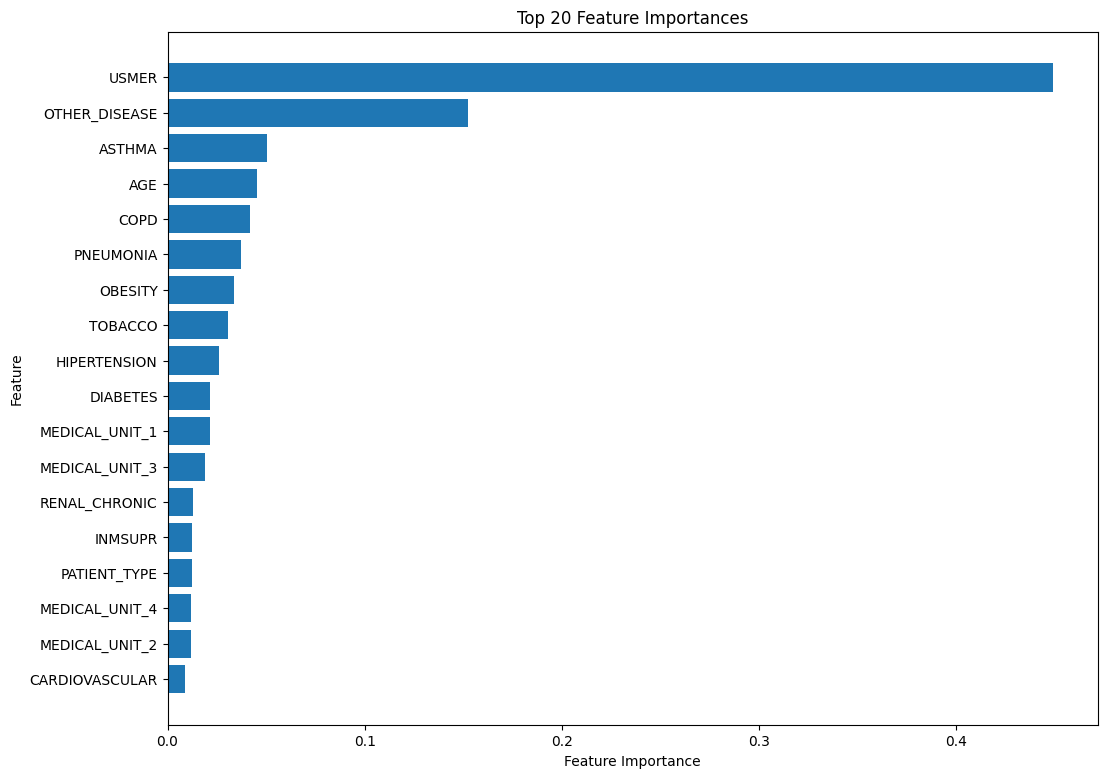

In [90]:
xgb_model=loaded_pipeline.named_steps['XGBClassifier']
importances = xgb_model.feature_importances_

feature_names=loaded_pipeline.named_steps['SMOTE'].get_feature_names_out()

# Sort feature importances
sorted_indices = np.argsort(importances)[::-1]
sorted_importances = importances[sorted_indices]
sorted_feature_names = np.array(feature_names)[sorted_indices]
top=20
# Plot the feature importances
plt.figure(figsize=(12, 9))
plt.barh(sorted_feature_names[:top], sorted_importances[:top], align='center')  # Top 10 features
plt.gca().invert_yaxis()  # To show the highest importance at the top
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title(f"Top {top} Feature Importances")
plt.show()